# **ML Project**
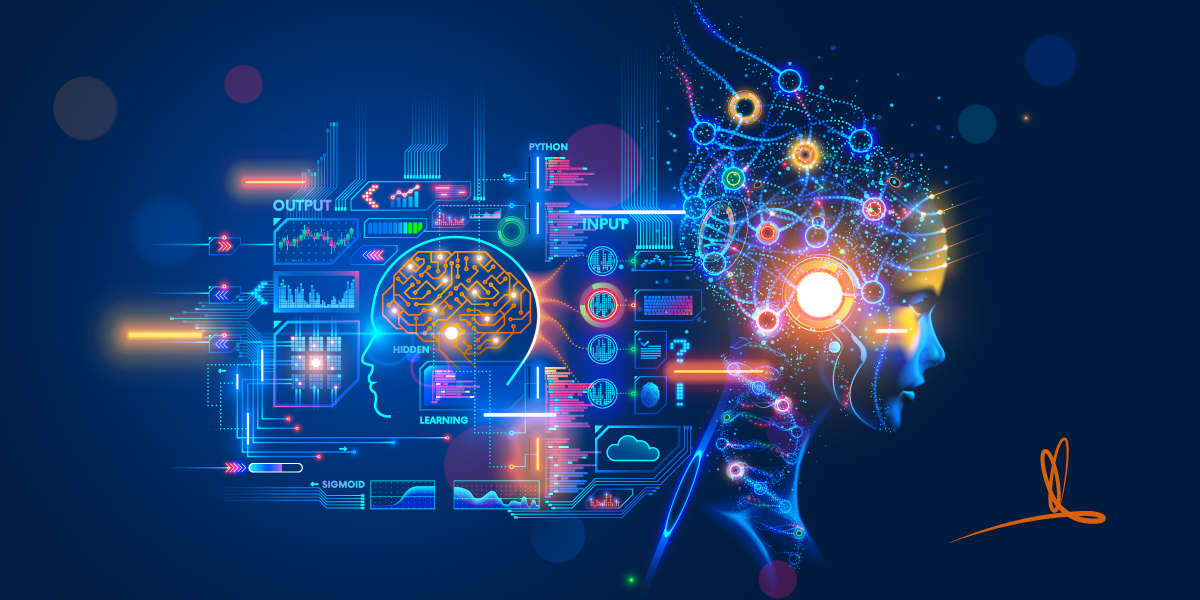




Csntributors:
• Andrea Vento (3224274)
• Alessandro Campi (3195274)
• Francesco Lupo (3196898)
• Riccardo Salza (3213766)

In [2]:
# Importing all libraries needed
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler



In [3]:
df_train = pd.read_csv('/Users/andreavento/Downloads/data/train.csv')
df_train

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,0.034949,59.0,0.0,0.004933,7959.688894,5.0,0.0,0.0,0.0,0.0
1,1,0.0,0.155308,47.0,0.0,881.000000,NaN,6.0,0.0,1.0,0.0,0.0
2,2,0.0,0.165166,62.0,1.0,0.020327,2851.722407,8.0,0.0,0.0,0.0,0.0
3,3,0.0,0.010886,61.0,0.0,0.642979,1115.657341,6.0,0.0,1.0,0.0,0.0
4,4,0.0,0.000717,49.0,0.0,3603.000000,NaN,15.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112495,112495,0.0,0.008277,59.0,0.0,0.252965,6829.298430,5.0,0.0,2.0,0.0,0.0
112496,112496,0.0,0.054864,53.0,1.0,0.506413,4591.184178,8.0,0.0,1.0,0.0,2.0
112497,112497,1.0,0.209912,55.0,0.0,1.570573,1475.249007,8.0,0.0,3.0,0.0,0.0
112498,112498,0.0,0.004995,27.0,0.0,3.589018,580.772521,4.0,0.0,1.0,0.0,0.0


We will update the test set with the modifications and engineered features needed for our models. We will pay extra attention not to include external information in the test set to prevent data leakage. All the modifications and the imputations will be carried out only using the information available in the 'df_train' set. 

In [4]:
df_test = pd.read_csv('/Users/andreavento/Downloads/data/test.csv')

We decided to split our 'df_train' into a training set and validation set. In order to do so we created an auxiliary dataframe 'df_copy' which will be divided in 'df_copy_train' and 'df_copy_val'. We decided to perform our EDA on the 'df_train' to analyse the largest possible number of observations while mantaining consistency with the validation set. All transformations and feature adjustments have also been performed on the 'df_copy_test', ensuring to limit ourselves to the information contained in said set, avoiding data leakege. 
This process is carried out to accurately assess the performance of our model on a new dataset.

In [5]:
from sklearn.model_selection import train_test_split

# Removing index column
df_train.drop('Unnamed: 0', axis=1, inplace=True)
df_test.drop('Unnamed: 0', axis=1, inplace=True)

df_copy_train, df_copy_val = train_test_split(df_train, test_size=0.2, random_state=1001)

In [6]:
n_obs = df_train.shape[0]
print("Total number of observations in the dataset:", n_obs)

Total number of observations in the dataset: 112500


In [7]:
print(df_train.isnull().sum())

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           22187
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2945
dtype: int64


In [8]:
print(df_test.isnull().sum())

RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           7544
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                       979
dtype: int64


In [9]:
print('MonthlyIncome NAs: ', 22187 / df_train.shape[0], '%')
print('NumberOfDependents: ', 2945 / df_train.shape[0], '%')

MonthlyIncome NAs:  0.19721777777777777 %
NumberOfDependents:  0.02617777777777778 %


In almost 20% of observations, the MonthlyIncome variable is missing

# Data Exploration and Cleaning

In [10]:
# Description of the variables
print(df_train.describe())

       SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines            age  \
count     112500.000000                         112500.000000  112500.000000   
mean           0.066844                              6.264202      52.468098   
std            0.249754                            259.629816      14.799413   
min            0.000000                              0.000000      -1.000000   
25%            0.000000                              0.029678      41.000000   
50%            0.000000                              0.153517      52.000000   
75%            0.000000                              0.558305      63.000000   
max            1.000000                          50708.000000     103.000000   

       NumberOfTime30-59DaysPastDueNotWorse      DebtRatio  MonthlyIncome  \
count                         112500.000000  112500.000000   9.031300e+04   
mean                               0.421351     353.833079   6.328072e+03   
std                                4.196450    2

**Data Visualisation**: Let's plot the histograms for all variables to study their distribution

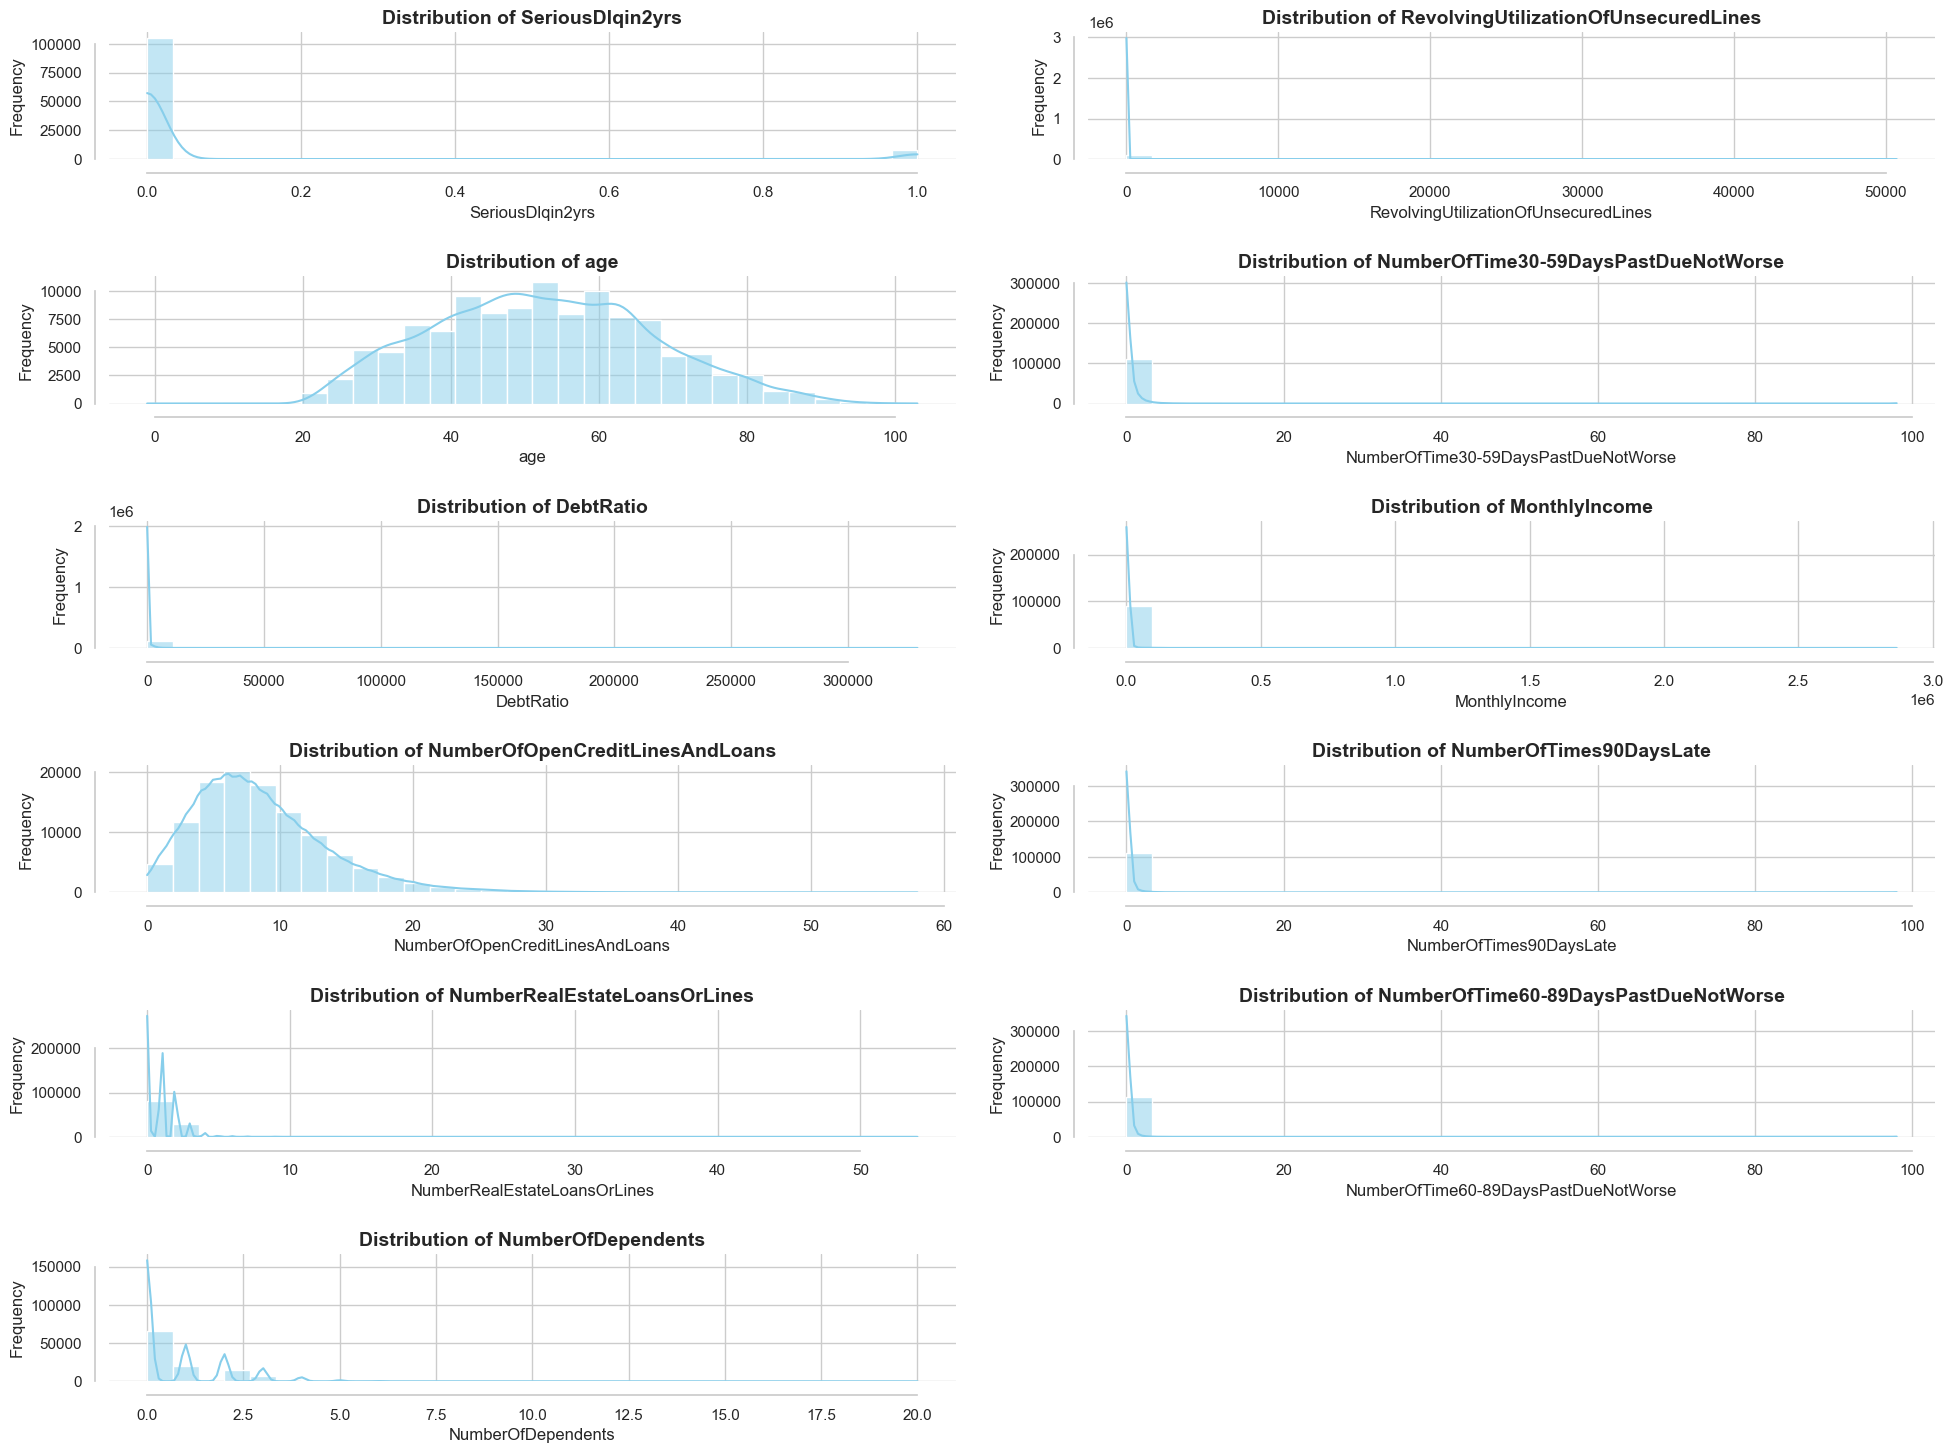

In [11]:
# Histograms
plt.figure(figsize=(20, 15))
sns.set(style="whitegrid")  

num_vars = df_train.select_dtypes(include=['float64', 'int64']).columns  
for i, var in enumerate(num_vars):
    ax = plt.subplot((len(num_vars) + 1) // 2, 2, i + 1)  
    sns.histplot(df_train[var], kde=True, color='skyblue', bins=30)  
    plt.title(f'Distribution of {var}', fontsize=14, fontweight='bold')
    plt.xlabel(var, fontsize=12)  
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10)
    sns.despine(trim=True, offset=10) 
    plt.tight_layout(pad=2.0)  

plt.show()

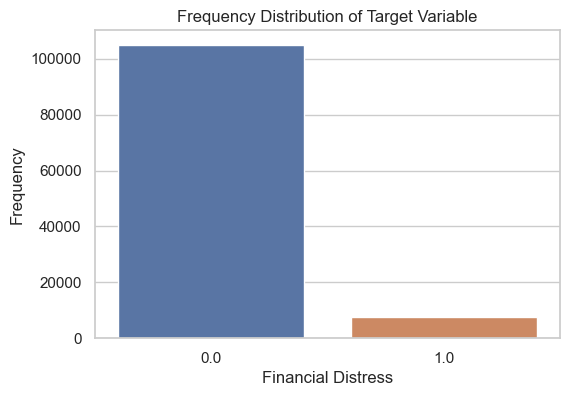

Frequency of each class:
 0.0    104980
1.0      7520
Name: SeriousDlqin2yrs, dtype: int64
Proportion of Defaulters 0.07163269194132216


In [12]:
# Study of the distribution of the target variable

# Count plot for the target variable
plt.figure(figsize=(6,4))  
sns.countplot(x=df_train['SeriousDlqin2yrs'])  
plt.title('Frequency Distribution of Target Variable')
plt.xlabel('Financial Distress')
plt.ylabel('Frequency')
plt.show()


# To get the proportion of the defaulters
class_counts = df_train['SeriousDlqin2yrs'].value_counts()
print("Frequency of each class:\n", class_counts)

proportion_of_0s_to_1s = class_counts[1] / class_counts[0]
print("Proportion of Defaulters", proportion_of_0s_to_1s)

Our target variable is highly imbalanced (the dafaulters are roughly the 7% of all observations).
Given that misclassifying a defaulter is worse than misclassifying a non-defaulter, we need to maximise the Area Under the Curve (AUC) of the Receiver Operating Characteristics (ROC) metric, to assess how well the model decides between positive or negative instances across all classification thresholds.

• MONTHLY INCOME AND DEBT RATIO\
 As Monthly income has 22187 NA values (about 20% of observations), we decided to fill it in. However, before doing so, we noticed that monthly income is crucial in evaluating another feature, DebtRatio, defined as 'monthly debt payments, alimony, living costs divided by monthly gross income'. For this reason, we decided to study the distribution of DebtRatio before imputing synthetic values for MonthlyIncome, suspecting that missing values for MonthlyIncome could be useful for understanding the behaviour of DebtRatio.

Let's first look at the distribution of DebtRatio

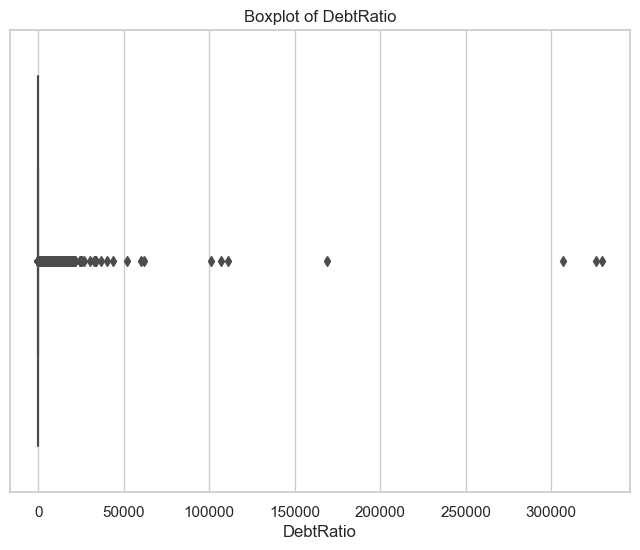

count    112500.000000
mean        353.833079
std        2153.220951
min           0.000000
25%           0.175078
50%           0.366299
75%           0.857619
max      329664.000000
Name: DebtRatio, dtype: float64

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='DebtRatio', data=df_train)
plt.title('Boxplot of DebtRatio')
plt.xlabel('DebtRatio')
plt.show()

df_train["DebtRatio"].describe()

In [14]:
Q1 = df_train['DebtRatio'].quantile(0.25)
Q3 = df_train['DebtRatio'].quantile(0.75)
IQR = Q3 - Q1

# Determining outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df_train[(df_train['DebtRatio'] < lower_bound) | 
                (df_train['DebtRatio'] > upper_bound)]
number_of_outliers = outliers.shape[0]

lower_bound, upper_bound, number_of_outliers

print('There are', number_of_outliers, 'observation exhibiting values above the IQR (',upper_bound,'), corresponding to the ', (number_of_outliers/n_obs)*100, '% of observations' )


There are 23342 observation exhibiting values above the IQR ( 1.8814301100000002 ), corresponding to the  20.748444444444445 % of observations


The variable is heavily skewed. About 21% of total observations exhibit a DebtRatio higher than 188%, which is concerning. 

In [15]:
high_debtratio_df = df_train[df_train['DebtRatio'] > upper_bound]

# Count the number of missing 'MonthlyIncome' values among these observations
missing_monthly_income_count = high_debtratio_df['MonthlyIncome'].isnull().sum()

print(f"There are {missing_monthly_income_count} missing 'MonthlyIncome' values among observations with 'DebtRatio' higher than the IQR upper bound ({upper_bound}).")
print(f'Therefore, {(missing_monthly_income_count/high_debtratio_df.shape[0])*100} % of outliers exhibit missing income values ')

There are 20788 missing 'MonthlyIncome' values among observations with 'DebtRatio' higher than the IQR upper bound (1.8814301100000002).
Therefore, 89.05834975580498 % of outliers exhibit missing income values 


About 90% of DebtRatio outliers do not have a MonthlyIncome value, which can indicate that, for these instances, the DebtRatio variable is actually an absolute debt, which could be explaining the unusual high values. Let's keep digging among MonthlyIncome missing values. 

In [16]:
df_train[(df_train['MonthlyIncome'].isnull()) & (df_train['DebtRatio'] < 1)]['DebtRatio'].value_counts()

0.0    1248
Name: DebtRatio, dtype: int64

The above cell above shows that, among the observations with missing Monthly Income, all the DebtRatios below 1 are actually zeros, possibly indicating that both Monthly Income and DebtRatio were missing among these individuals. 

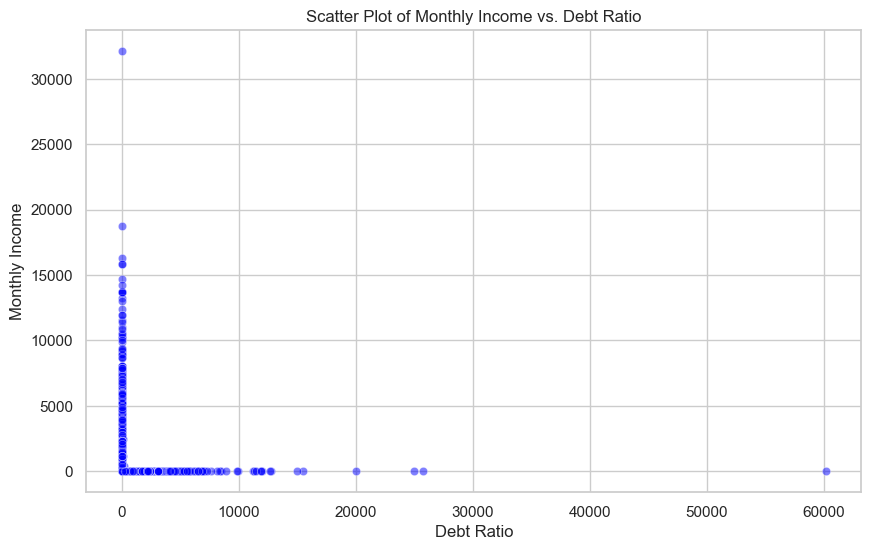

,DebtRatio,MonthlyIncome
26,7.058941,961.233711
63,62.138614,94.038761
154,7.502618,2000.687362
216,51.000000,0.000000
277,1834.000000,0.000000
...,...,...
112258,968.000000,0.000000
112259,1.883415,1160.006660
112374,2215.000000,0.000000
112453,2283.000000,0.000000


In [17]:
filtered_data = df_train[(df_train['DebtRatio'] > upper_bound) & (df_train['MonthlyIncome'].notnull())][['DebtRatio', 'MonthlyIncome']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='DebtRatio', y='MonthlyIncome', data=filtered_data, color='blue', alpha=0.5)
plt.title('Scatter Plot of Monthly Income vs. Debt Ratio')
plt.xlabel('Debt Ratio')
plt.ylabel('Monthly Income')
plt.grid(True)
plt.show()

filtered_data

From this data, we can clearly see that Extremely high values of DebtRatio are registered whenever the MonthlyIncome value is equal to (or dangerously close to) 0, further supporting the idea that values of DebtRatio above a certain threshold could be interpreted as raw debt instead of a percentage. 

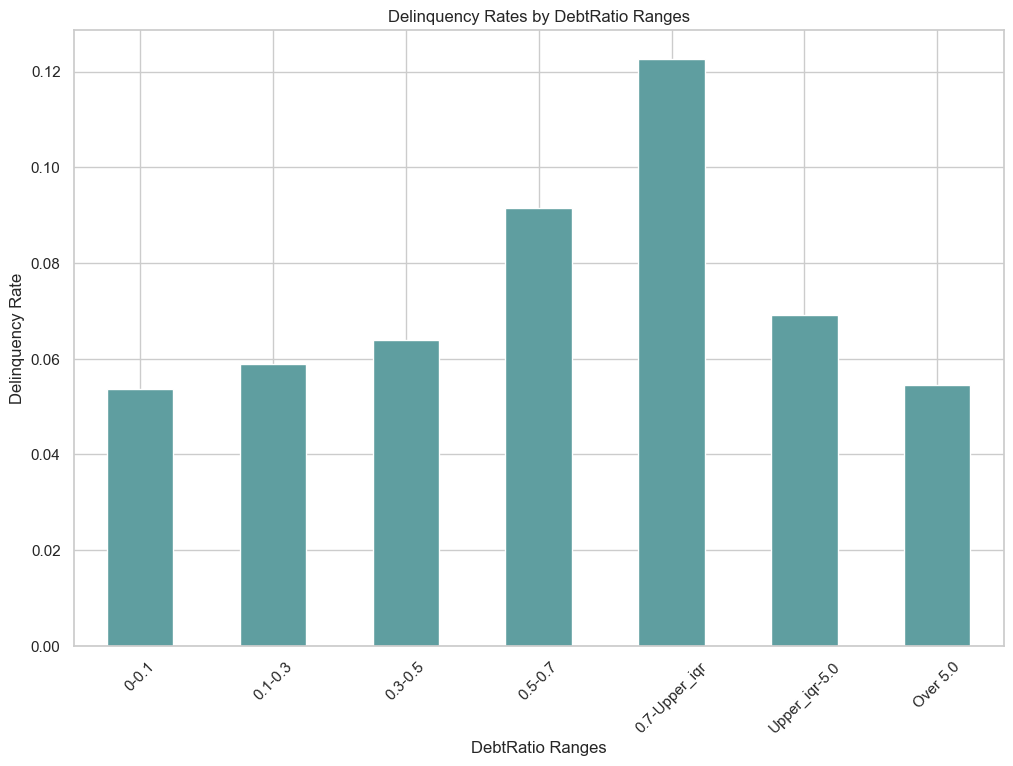

DebtRatio_Range
0-0.1            0.053582
0.1-0.3          0.058956
0.3-0.5          0.063838
0.5-0.7          0.091539
0.7-Upper_iqr    0.122557
Upper_iqr-5.0    0.069106
Over 5.0         0.054498
Name: SeriousDlqin2yrs, dtype: float64

In [18]:
upper_bound = 1.882382300875
bins = [0, 0.1, 0.3, 0.5, 0.7, upper_bound, 5.0, float('inf')]
labels = ['0-0.1', '0.1-0.3', '0.3-0.5', '0.5-0.7', '0.7-Upper_iqr', 'Upper_iqr-5.0', 'Over 5.0']

# Categorize the data based on the specified bins
df_train['DebtRatio_Range'] = pd.cut(df_train['DebtRatio'], bins=bins, labels=labels)

# Calculate delinquency rates for each bin
delinquency_rates_fine_bins_debt = df_train.groupby('DebtRatio_Range')['SeriousDlqin2yrs'].mean()

# Visualization
plt.figure(figsize=(12, 8))
delinquency_rates_fine_bins_debt.plot(kind='bar', color='cadetblue')
plt.title('Delinquency Rates by DebtRatio Ranges')
plt.xlabel('DebtRatio Ranges')
plt.ylabel('Delinquency Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

delinquency_rates_fine_bins_debt

To further strengthen our intuition, individuals with extremely high registered DebtRatio (>5) exhibit Deliquency rates compatible with the average individual. Having taken into consideration all the above information, we decided to considered all DebtRatio values above 5 as absolute raw Debt, classifying the Monthly Income associated with these observations as missing. 
Following this procedure, we will treat the MonthlyIncome of individuals who show extremely high DebtRatio as NA, resulting in these values to be imputed using statistically robust methods, and ultimately transforming the raw Debt into a partially imputed DebtRatio. 

In [19]:
# After all our considerations, we decided to turn into NAs all values of MontlhyIncome associated with values of DebtRatio higher than 50. This operation is carried out both on the 
# 'df_copy_train' and the 'df_copy_val' since we are not adding any external information to the dataset. Moreover, once we will perform the imputation of the 'MonthyIncome' variable, when 
# applying the operation of 'df_copy_val', we will only use the information available in 'df_copy_train' avoiding any data leakege. 


df_train.loc[df_train['DebtRatio'] > 50, 'MonthlyIncome'] = pd.NA
df_copy_train.loc[df_copy_train['DebtRatio'] > 50, 'MonthlyIncome'] = pd.NA
df_copy_val.loc[df_copy_val['DebtRatio'] > 50, 'MonthlyIncome'] = pd.NA

# We will apply the same operation on the test set, but we will only fill the missing values with data coming from te 'df_train' set. 
df_test.loc[df_test['DebtRatio'] > 50, 'MonthlyIncome'] = pd.NA

# Verify changes by checking the number of missing 'MonthlyIncome' values
missing_income_count = df_train['MonthlyIncome'].isna().sum()
print(f"Now, there are {missing_income_count} missing values in 'MonthlyIncome'.")


Now, there are 23543 missing values in 'MonthlyIncome'.


Now, we flag the observations with missing values of Monthly Income as it will be useful when we will have to recompute the DebtRatio of said observations as the ratio between original (raw) Debt and newly imputed Monthly Income. 

In [20]:
df_train['was_missing_income'] = df_train['MonthlyIncome'].isna()
df_copy_train['was_missing_income'] = df_copy_train['MonthlyIncome'].isna()
df_copy_val['was_missing_income'] = df_copy_val['MonthlyIncome'].isna()
df_test['was_missing_income'] = df_test['MonthlyIncome'].isna()

# We actually decided not to drop this column as we think that the absence of the income value could be due to some problems and issues related to the individual

Let's now study the distribution of Monthly income before filling it. 

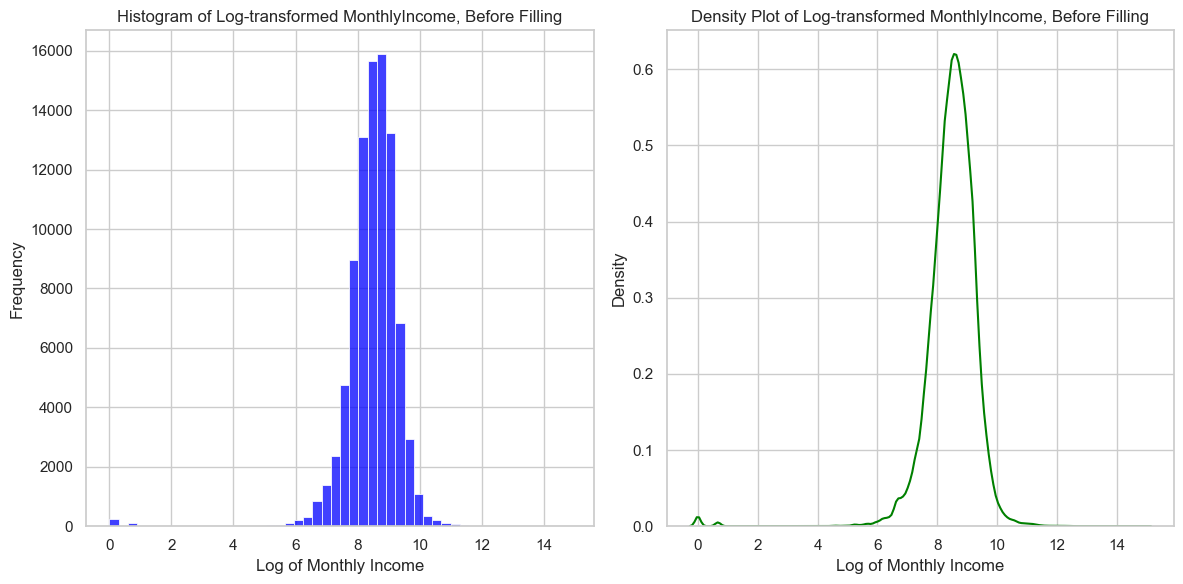

In [21]:
# Visualisation of the distribution of MonthlyIncome
plt.figure(figsize=(12, 6))

# Histogram of the log-transformed MonthlyIncome for visualization purposes only
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_train['MonthlyIncome']), bins=50, kde=False, color='blue')
plt.title('Histogram of Log-transformed MonthlyIncome, Before Filling')
plt.xlabel('Log of Monthly Income')
plt.ylabel('Frequency')

# Density Plot of the log-transformed MonthlyIncome for visualization purposes only
plt.subplot(1, 2, 2)
sns.kdeplot(np.log1p(df_train['MonthlyIncome']), color='green')
plt.title('Density Plot of Log-transformed MonthlyIncome, Before Filling')
plt.xlabel('Log of Monthly Income')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

As **MonthlyIncome** has, after the DebtRatio analysis, 23961  NA values (about 22% of observations), we decided to fill it. 
Due to issues related to scaling and robustness we decided to disregard the K-NN inputation on this dataset with high presence of skewed variables. 
We therefore decided to adopt a grouped-median appoach based on the age of the individual. 
We divided the individuals in 5 groups:['18-30', '31-50', '51-65', '66+'] since people aged differently probably will exhibit different median incomes. Then, we will fill it the missing data with the respective group's median monthly income

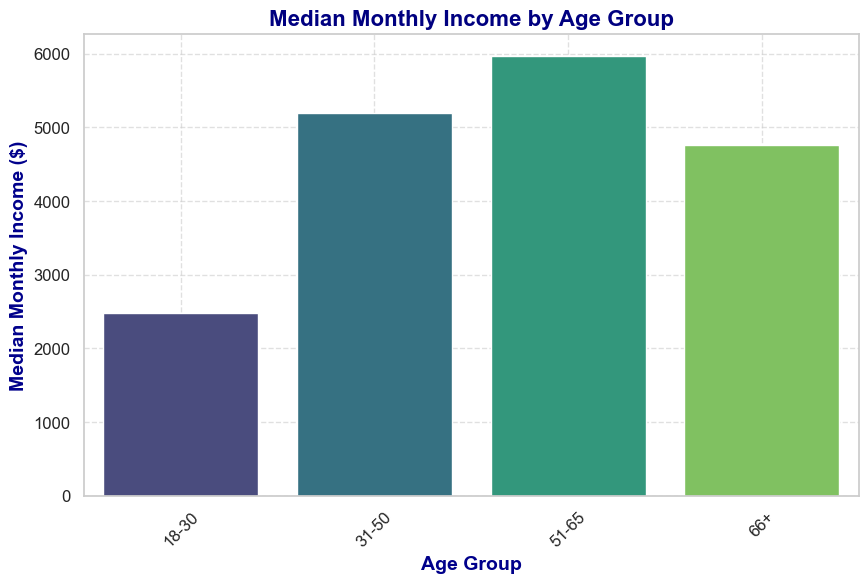

In [22]:
# Age-Grouped Median filling of MonthlyIncome NA values

bins = [-10, 30, 50, 65, 110]  # Adjust the bins as needed based on your data
labels = ['18-30', '31-50', '51-65', '66+']


# We divide using only the information in the training set, to avoid data Leakege. 
df_train['age_group'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)
df_test['age_group'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)

# On the splitted data, we only perform the operation using the information in the df_copy_train set
df_copy_train['age_group'] = pd.cut(df_copy_train['age'], bins=bins, labels=labels, right=False)
df_copy_val['age_group'] = pd.cut(df_copy_val['age'], bins=bins, labels=labels, right=False)

# Calculate median income for each age group (only for the training sets)
median_income_by_age_group = df_copy_train.groupby('age_group')['MonthlyIncome'].median()
median_income_by_age_group_total = df_train.groupby('age_group')['MonthlyIncome'].median()

# Stored as a safeguard whenever the 'age_group' in the test set is not available
total_median_income_df_train = df_train['MonthlyIncome'].median() 

# Plot the median income by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=median_income_by_age_group.index, y=median_income_by_age_group.values, palette="viridis")
plt.title('Median Monthly Income by Age Group', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Age Group', fontsize=14, fontweight='bold', color='darkblue')
plt.ylabel('Median Monthly Income ($)', fontsize=14, fontweight='bold', color='darkblue')
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6) 
plt.show()

As expected, older individuals tend to earn an higher wage.\
Individuals older than 66 represent an exception as the median is probably deflated by the high number of retired workers, category that will be further analysed later in our reseach. 

In [23]:
# Impute missing MonthlyIncome values based on age group (for split dataset, based only on df_copy_train)
def impute_income_split(row):
    if pd.isna(row['MonthlyIncome']):
        return median_income_by_age_group[row['age_group']]
    else:
        return row['MonthlyIncome']
    
# Impute missing MonthlyIncome median values of 'df_train' based on age group (same values will also be used for df_test)
def impute_income_total(row):
    if pd.isna(row['age_group']) or row['age_group'] not in median_income_by_age_group_total:
        return total_median_income_df_train
    elif pd.isna(row['MonthlyIncome']):
        return median_income_by_age_group_total[row['age_group']]
    else:
        return row['MonthlyIncome']

df_train['MonthlyIncome'] = df_train.apply(impute_income_total, axis=1)
df_copy_train['MonthlyIncome'] = df_copy_train.apply(impute_income_split, axis=1)

# We apply the imputing technique to the validation set using only the information from the training set
df_copy_val['MonthlyIncome'] = df_copy_val.apply(impute_income_split, axis=1)

# We apply the imputing technique to the test set using only the information from the total training set
df_test['MonthlyIncome'] = df_test.apply(impute_income_total, axis=1)

# Remove the age_group column as its no longer needed
df_copy_train.drop('age_group', axis=1, inplace=True)
df_copy_val.drop('age_group', axis=1, inplace=True)
df_train.drop('age_group', axis=1, inplace=True)
df_test.drop('age_group', axis=1, inplace=True)


In the above cell, we imputed the missing values for Monthly Income. As for 'df_train', we used the whole dataset, while values in 'df_copy_train' and 'df_copy_val' have been imputed using only information contained into 'df_copy_train' to ensure validation correctness

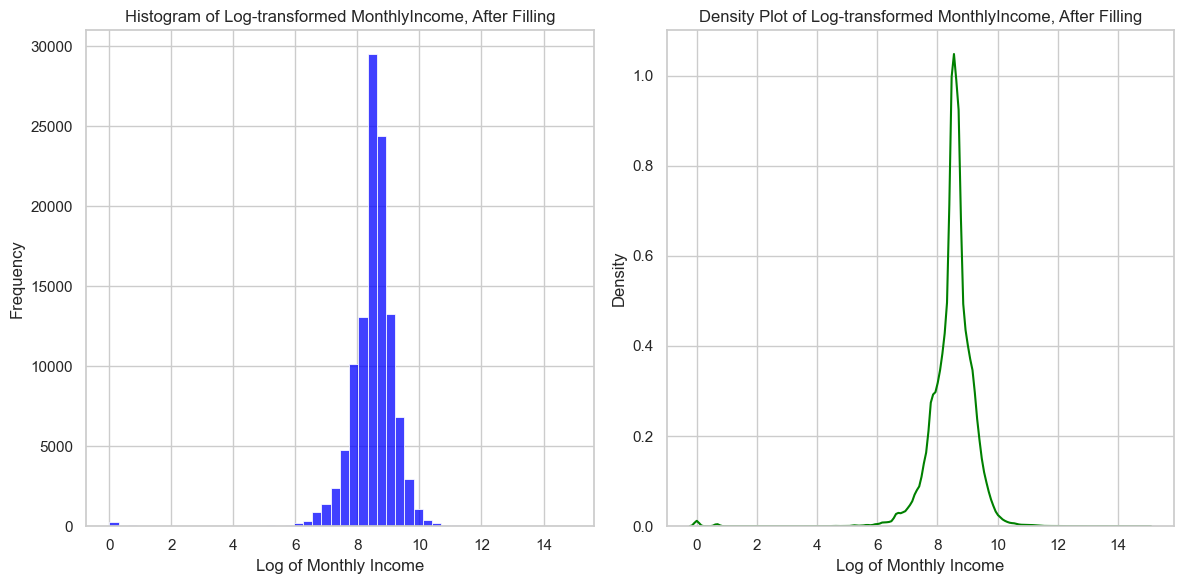

In [24]:
# Visualisation of the distribution of Monthly income

plt.figure(figsize=(12, 6))

# Histogram of the log-transformed MonthlyIncome for visualization purposes only
plt.subplot(1, 2, 1)
sns.histplot(np.log1p(df_train['MonthlyIncome']), bins=50, kde=False, color='blue')
plt.title('Histogram of Log-transformed MonthlyIncome, After Filling')
plt.xlabel('Log of Monthly Income')
plt.ylabel('Frequency')

# Density Plot of the log-transformed MonthlyIncome for visualization purposes only
plt.subplot(1, 2, 2)
sns.kdeplot(np.log1p(df_train['MonthlyIncome']), color='green')
plt.title('Density Plot of Log-transformed MonthlyIncome, After Filling')
plt.xlabel('Log of Monthly Income')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Let's finally properly compute the DebtRatio of the observations that were originally missing MonthlyIncome.

In [25]:

df_train.loc[df_train['was_missing_income'], 'DebtRatio'] = df_train['DebtRatio'] / df_train['MonthlyIncome']
df_test.loc[df_test['was_missing_income'], 'DebtRatio'] = df_test['DebtRatio'] / df_test['MonthlyIncome']


df_copy_train.loc[df_train['was_missing_income'], 'DebtRatio'] = df_copy_train['DebtRatio'] / df_train['MonthlyIncome']
df_copy_val.loc[df_copy_val['was_missing_income'], 'DebtRatio'] = df_copy_val['DebtRatio'] / df_copy_val['MonthlyIncome']

**NumberOfDependents** :  variable exhibits 2945 missing values.

---



As we did with MonthlyIncome, let's first look at its distribution before delving into the interpolation of the NAs.

In [26]:
print("NaN values before:", df_train['NumberOfDependents'].isna().sum())
df_train['NumberOfDependents'].fillna(0, inplace=True) 

# Ensure the data type is correct
df_train['NumberOfDependents'] = df_train['NumberOfDependents'].astype(float)

# Calculate the percentile rank for each unique value
unique_values = df_train['NumberOfDependents'].unique()
percentiles = {value: np.percentile(df_train['NumberOfDependents'], 100 * (df_train['NumberOfDependents'] <= value).mean()) for value in unique_values}

# Ensure no NaNs in percentile calculations
if np.isnan(list(percentiles.values())).any():
    print("NaN found in percentile calculations")
else:
    # Sorting the dictionary by value for better readability
    percentiles_sorted = dict(sorted(percentiles.items(), key=lambda item: item[1]))

    # Converting percentiles to a more readable format, displaying ranks as integers
    percentiles_readable = {k: f"{v:.0f}th" for k, v in percentiles_sorted.items()}
    print(percentiles_readable)

NaN values before: 2945
{0.0: '0th', 1.0: '1th', 2.0: '2th', 3.0: '3th', 4.0: '4th', 5.0: '5th', 6.0: '6th', 7.0: '7th', 8.0: '8th', 9.0: '9th', 10.0: '10th', 20.0: '20th'}


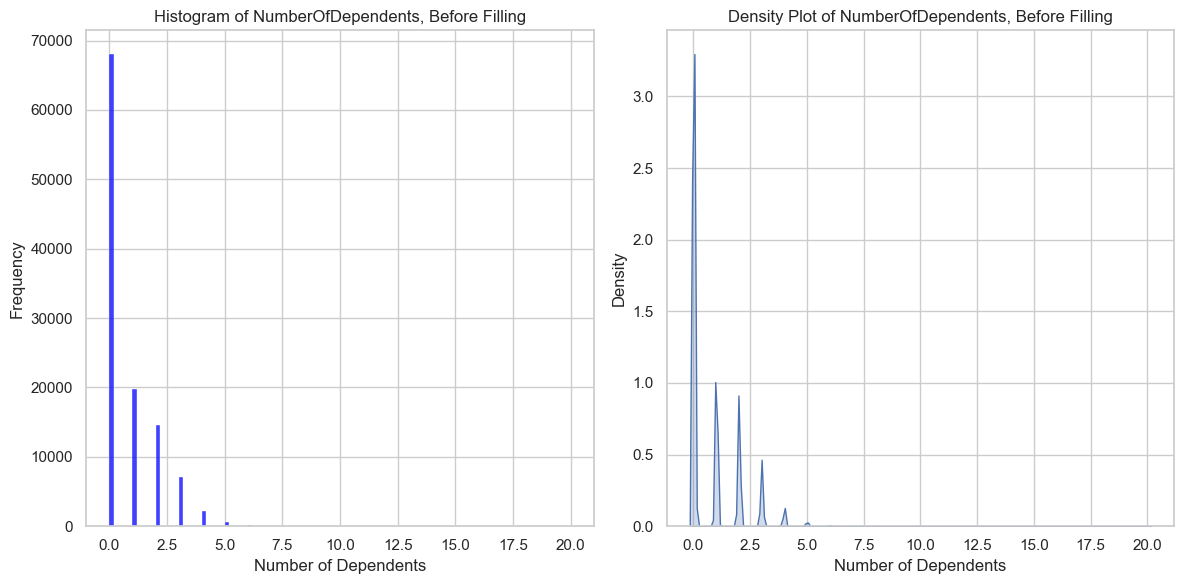

In [27]:
plt.figure(figsize=(12, 6))

# Histogram and Density Plot of NumberOfDependents
plt.subplot(1, 2, 1)
sns.histplot(df_train['NumberOfDependents'], kde=False, bins=100, color='blue')
plt.title('Histogram of NumberOfDependents, Before Filling')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')

# Density Plot of NumberOfDependents
plt.subplot(1, 2, 2)
sns.kdeplot(df_train['NumberOfDependents'], bw_adjust=0.5, fill=True)
plt.title('Density Plot of NumberOfDependents, Before Filling')
plt.xlabel('Number of Dependents')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Being NumberOfDependents a right-skewed count variable, we decided to fill the NA values following an Age-Group mode approach.
Imputing the most popular value among the respective age group.

In [28]:
# Age_group mode based approach

bins = [-10, 30, 50, 65, 110]  # Defines age groups
labels = ['0-30', '31-50', '51-65', '66+']
df_train['age_group'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)

# Calculate the mode of NumberOfDependents for each age group
mode_dependents_by_age_group = df_train.groupby('age_group')['NumberOfDependents'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Impute missing NumberOfDependents values based on age group
def impute_dependents(row):
    if pd.isna(row['NumberOfDependents']):
        return mode_dependents_by_age_group[row['age_group']]
    else:
        return row['NumberOfDependents']

df_train['NumberOfDependents'] = df_train.apply(impute_dependents, axis=1)

# Remove the age_group column as it is no longer needed
df_train.drop('age_group', axis=1, inplace=True)

In [29]:
# As 0 dependents is the mode for every considered age, we simply impute 0 as missing value both in 'df_copy_train', 'df_copy_val' and 'df_test'

df_copy_train['NumberOfDependents'].fillna(0, inplace=True)
df_copy_val['NumberOfDependents'].fillna(0, inplace=True)
df_test['NumberOfDependents'].fillna(0, inplace=True)

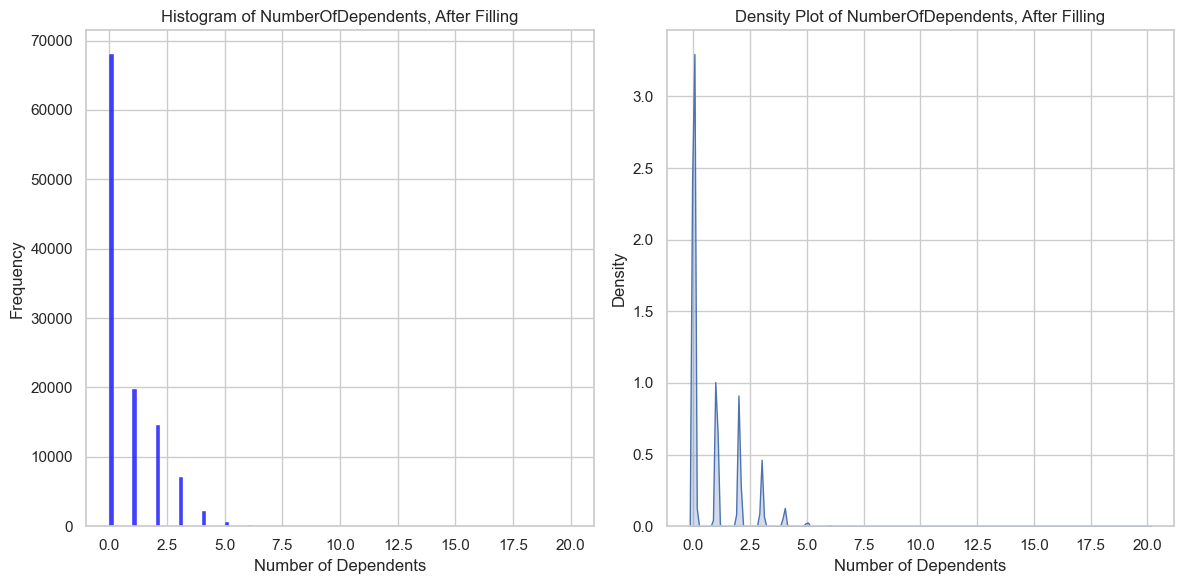

In [30]:
plt.figure(figsize=(12, 6))

# Histogram and Density Plot of NumberOfDependents
plt.subplot(1, 2, 1)
sns.histplot(df_train['NumberOfDependents'], kde=False, bins=100, color='blue')
plt.title('Histogram of NumberOfDependents, After Filling')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')

# Density Plot of NumberOfDependents
plt.subplot(1, 2, 2)
sns.kdeplot(df_train['NumberOfDependents'], bw_adjust=0.5, fill=True)
plt.title('Density Plot of NumberOfDependents, After Filling')
plt.xlabel('Number of Dependents')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

**Age Variable**: Cleaning of the 'Age' Variable.

In [31]:
age_issues = {
    "Extremely low Values (Underage)": df_train[df_train['age'] < 18]['age'].count(),
    "Zero Values": df_train[df_train['age'] == 0]['age'].count(),
    "Extremely High Values (>100 years)": df_train[df_train['age'] > 100]['age'].count(),
}

print("Age Issues Summary:", age_issues)

Age Issues Summary: {'Extremely low Values (Underage)': 1, 'Zero Values': 0, 'Extremely High Values (>100 years)': 5}


Since there is only one value with non-appropriate age (under 18, actually just 1), we thought there was an input error, therefore we substituted the wrong value with the median age to preserve the information contained in that observation.

We also noticed some outliers (above 100 years) but decided to keep them after investigating their count and related features (they are probably legit outliers, without input errors)

In [32]:
median_age = df_train[df_train['age'] > 0]['age'].median()

# Replace the erroneous age value with the median age
df_train.loc[df_train['age'] <= 0, 'age'] = median_age

# Whenever the age is negative in the test set, we replace it with the median age of the training set
df_test.loc[df_train['age'] <= 0, 'age'] = median_age

The same process is carried out in the validation set

In [33]:
median_age = df_copy_train[df_train['age'] > 0]['age'].median()

# Replace the erroneous age value with the median age
df_copy_train.loc[df_train['age'] <= 0, 'age'] = median_age
df_copy_val.loc[df_train['age'] <= 0, 'age'] = median_age

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/4111444403.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  median_age = df_copy_train[df_train['age'] > 0]['age'].median()


**RevolvingUtilizationOfUnsecuredLines**: the proportion of the total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits. It is a percentage, industry standards indicate that it is rarely more than one. 

In [34]:
df_train['RevolvingUtilizationOfUnsecuredLines'].describe()

count    112500.000000
mean          6.264202
std         259.629816
min           0.000000
25%           0.029678
50%           0.153517
75%           0.558305
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

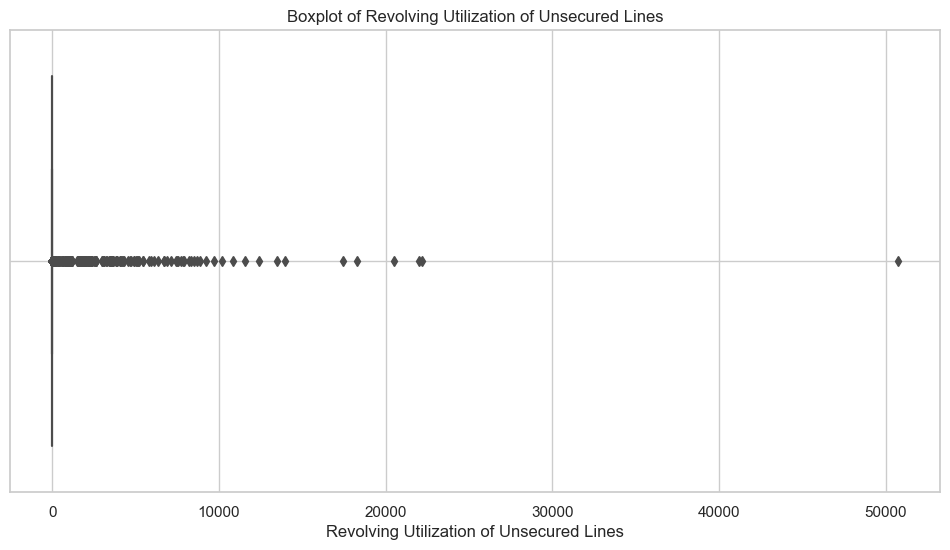

In [35]:
# Boxplot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x= df_train['RevolvingUtilizationOfUnsecuredLines'])
plt.title('Boxplot of Revolving Utilization of Unsecured Lines')
plt.xlabel('Revolving Utilization of Unsecured Lines')
plt.grid(True)
plt.show()

In [36]:
# Calculate IQR
Q1 = df_train['RevolvingUtilizationOfUnsecuredLines'].quantile(0.25)
Q3 = df_train['RevolvingUtilizationOfUnsecuredLines'].quantile(0.75)
IQR = Q3 - Q1

# Determine outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df_train[(df_train['RevolvingUtilizationOfUnsecuredLines'] < lower_bound) | 
                (df_train['RevolvingUtilizationOfUnsecuredLines'] > upper_bound)]
number_of_outliers = outliers.shape[0]

lower_bound, upper_bound, number_of_outliers

print('There are', number_of_outliers, 'observation exhibiting values above the IQR (',upper_bound,'), corresponding to the ', (number_of_outliers/n_obs)*100, '% of observations' )

There are 591 observation exhibiting values above the IQR ( 1.3512457922499999 ), corresponding to the  0.5253333333333333 % of observations


Before deciding how to handle these outliers, let's investigate whether the Delinquency rate differs from non-outliers

In [37]:
upper_bound

1.3512457922499999

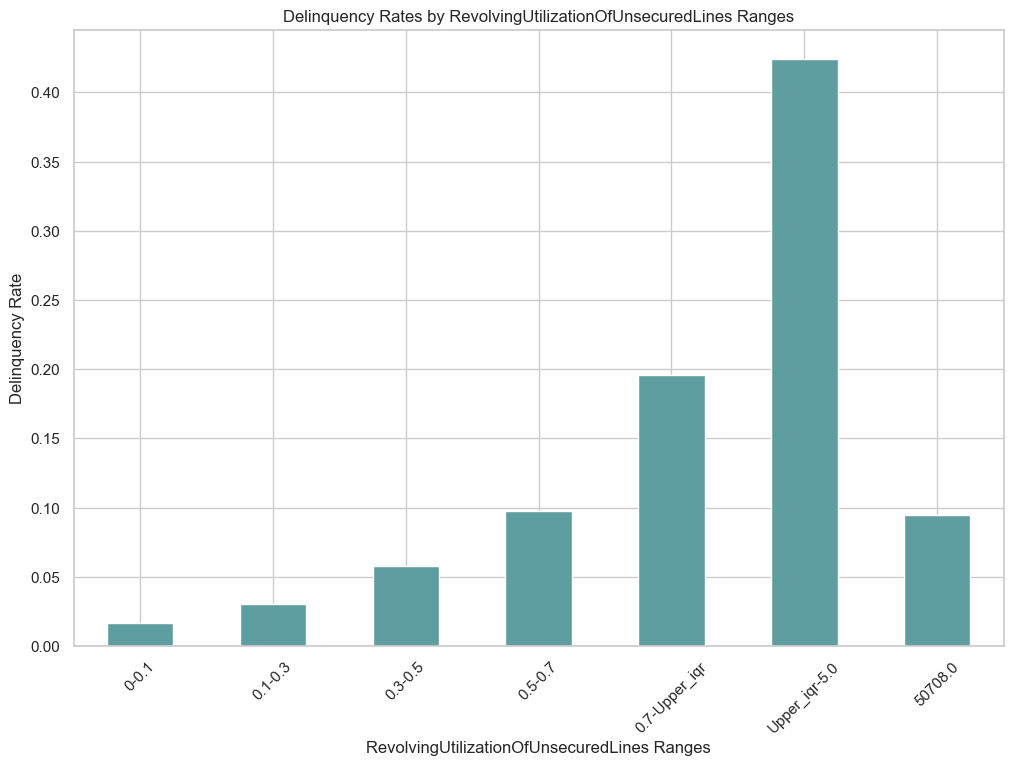

Utilization_Range
0-0.1            0.016446
0.1-0.3          0.030216
0.3-0.5          0.057941
0.5-0.7          0.097638
0.7-Upper_iqr    0.195809
Upper_iqr-5.0    0.423940
50708.0          0.094737
Name: SeriousDlqin2yrs, dtype: float64

In [38]:
bins = [0, 0.1, 0.3, 0.5, 0.7, upper_bound, 5.0, float('inf')]
labels = ['0-0.1', '0.1-0.3', '0.3-0.5', '0.5-0.7', '0.7-Upper_iqr', 'Upper_iqr-5.0', df_train['RevolvingUtilizationOfUnsecuredLines'].max()]

# Categorize the data based on the specified bins
df_train['Utilization_Range'] = pd.cut(df_train['RevolvingUtilizationOfUnsecuredLines'], bins=bins, labels=labels)

# Calculate delinquency rates for each bin
delinquency_rates_fine_bins = df_train.groupby('Utilization_Range')['SeriousDlqin2yrs'].mean()

# Visualization
plt.figure(figsize=(12, 8))
delinquency_rates_fine_bins.plot(kind='bar', color='cadetblue')
plt.title('Delinquency Rates by RevolvingUtilizationOfUnsecuredLines Ranges')
plt.xlabel('RevolvingUtilizationOfUnsecuredLines Ranges')
plt.ylabel('Delinquency Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

delinquency_rates_fine_bins

This analysis clearly shows a positive relation between the RevolvingUtilizationOfUnsecuredLines values and the probability of Delinquency. 
However, individuals with extreme high values of RevolvingUtilizationOfUnsecuredLines (>5) don't follow this trend, potentially indicating 2 things: 
• they simply are error in data entry, which could be the case since there are only 190 of them
• they are not errors, representing individuals which leverage sophisticated financial strategies enabling them to sustain this RevolvingUtilizationOfUnsecuredLines values. 
In both cases, this data would not be helpful to achieve our goal of correctly predicting the probability of default for the highest number of individuals, with the lowest possible error, therefore, we decided to drop these observations to better generalize.

In [39]:
df_train = df_train[df_train['RevolvingUtilizationOfUnsecuredLines'] <= 5]

# We apply this filter only on the df_copy_train set as we can't discard observations in the validation set. 
df_copy_train = df_copy_train[df_copy_train['RevolvingUtilizationOfUnsecuredLines'] <= 5]

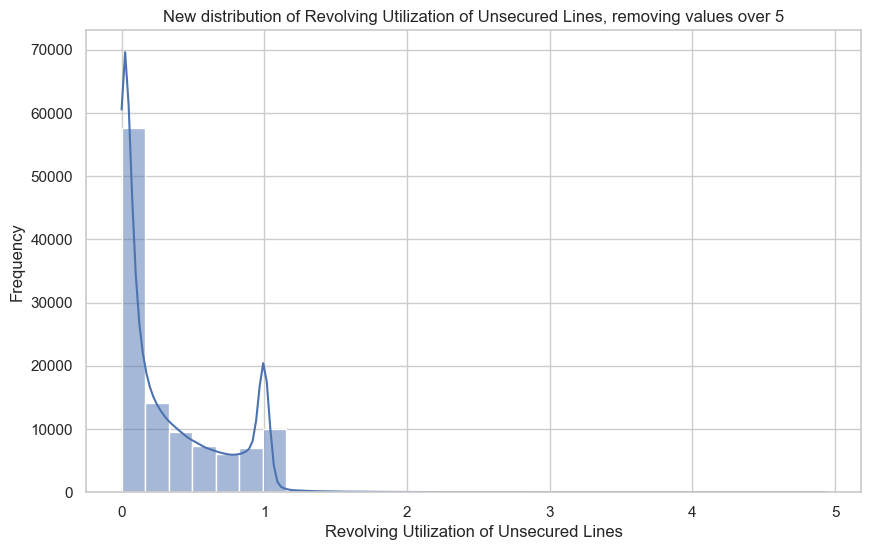

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['RevolvingUtilizationOfUnsecuredLines'], bins=30, kde=True)
plt.title('New distribution of Revolving Utilization of Unsecured Lines, removing values over 5')
plt.xlabel('Revolving Utilization of Unsecured Lines')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Let's now focus on the variables describing the *NUMBER OF TIMES AN INDIVIDUAL HAS BEEN LATE* for specified ranges of days.

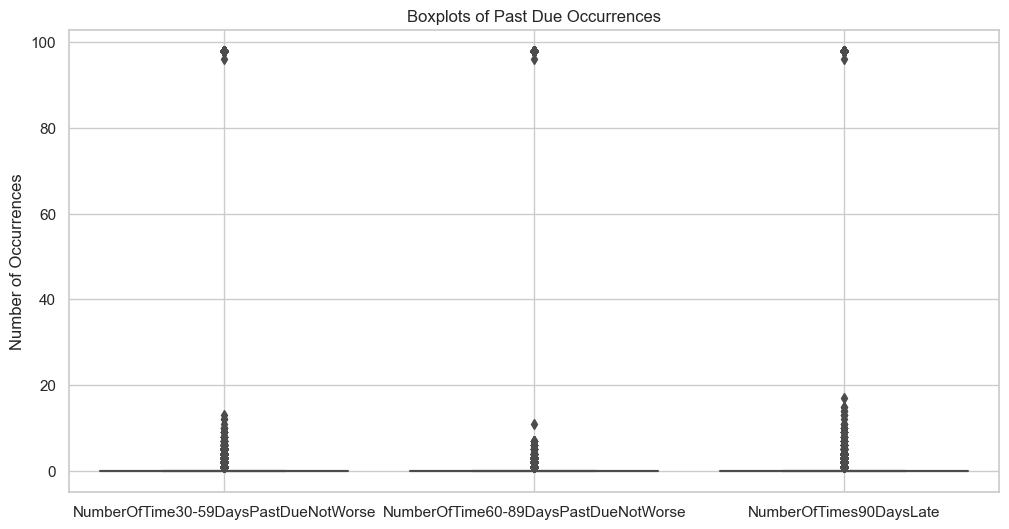

In [41]:
# Let's first understand their distribution

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train[['NumberOfTime30-59DaysPastDueNotWorse', 
                                    'NumberOfTime60-89DaysPastDueNotWorse', 
                                    'NumberOfTimes90DaysLate']])
plt.title('Boxplots of Past Due Occurrences')
plt.ylabel('Number of Occurrences')
plt.grid(True)
plt.show()

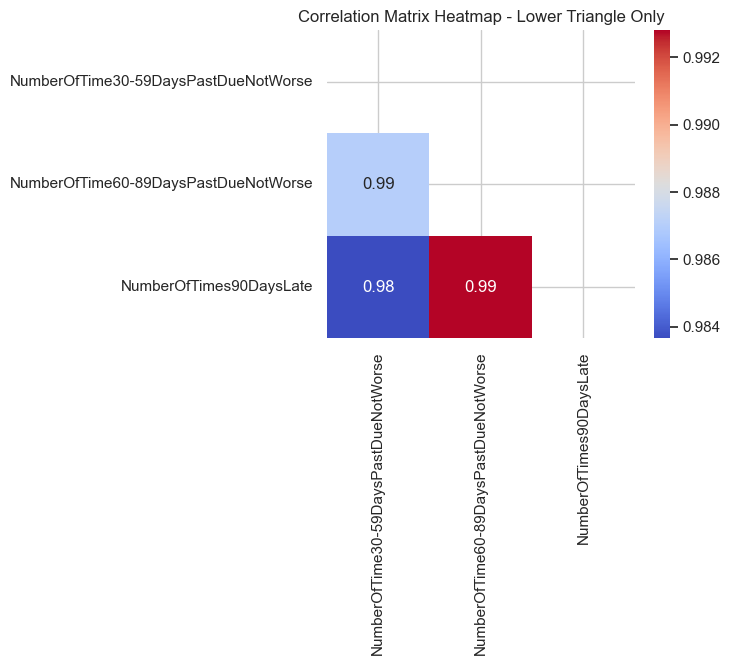

In [42]:
correlation_matrix = df_train[['NumberOfTime30-59DaysPastDueNotWorse',
                               'NumberOfTime60-89DaysPastDueNotWorse',
                               'NumberOfTimes90DaysLate']].corr()

# Generate a mask for the upper triangle (masking the upper half)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap - Lower Triangle Only')
plt.show()

As evident, the three variables are extremely highly correlated and right skewed. 
The boxplot evidences a huge gap in observations: let's look at it in more detail

In [43]:
late_pay_cols = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse",
                "NumberOfTime30-59DaysPastDueNotWorse"]

In [44]:
df_train["NumberOfTimes90DaysLate"].value_counts().sort_index()

0.0     106023
1.0       3951
2.0       1168
3.0        515
4.0        230
5.0         89
6.0         59
7.0         27
8.0         14
9.0         14
10.0         6
11.0         3
12.0         1
13.0         3
14.0         2
15.0         2
17.0         1
96.0         1
98.0       201
Name: NumberOfTimes90DaysLate, dtype: int64

In [45]:
df_train["NumberOfTime60-89DaysPastDueNotWorse"].value_counts().sort_index()

0.0     106596
1.0       4322
2.0        827
3.0        241
4.0         77
5.0         27
6.0         11
7.0          6
11.0         1
96.0         1
98.0       201
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64

In [46]:
df_train["NumberOfTime30-59DaysPastDueNotWorse"].value_counts().sort_index()

0.0     94307
1.0     12068
2.0      3438
3.0      1326
4.0       534
5.0       252
6.0       104
7.0        41
8.0        22
9.0         8
10.0        4
11.0        1
12.0        2
13.0        1
96.0        1
98.0      201
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [47]:
distinct_triples_counts = {}

# Filter rows where NumberOfTimes90DaysLate > 17 and iterate over them
for values in df_train[df_train["NumberOfTimes90DaysLate"] > 17][late_pay_cols].values:
    triple_key = ','.join(map(str, values))

    distinct_triples_counts[triple_key] = distinct_triples_counts.get(triple_key, 0) + 1

# Print the dictionary of counts
print(distinct_triples_counts)

{'98.0,98.0,98.0': 201, '96.0,96.0,96.0': 1}


As we can clearly see, there is a cluster with value 98, possibly indicating an input error or a placeholder value for unknown real value. The placeholder hypothesis is further validates as the 98 value is found in each of the three analysed variables. 

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/1713849241.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Bins_30_59'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=bins, labels=labels)
/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/1713849241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Bins_60_89'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=bins, labels=labels)
/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm

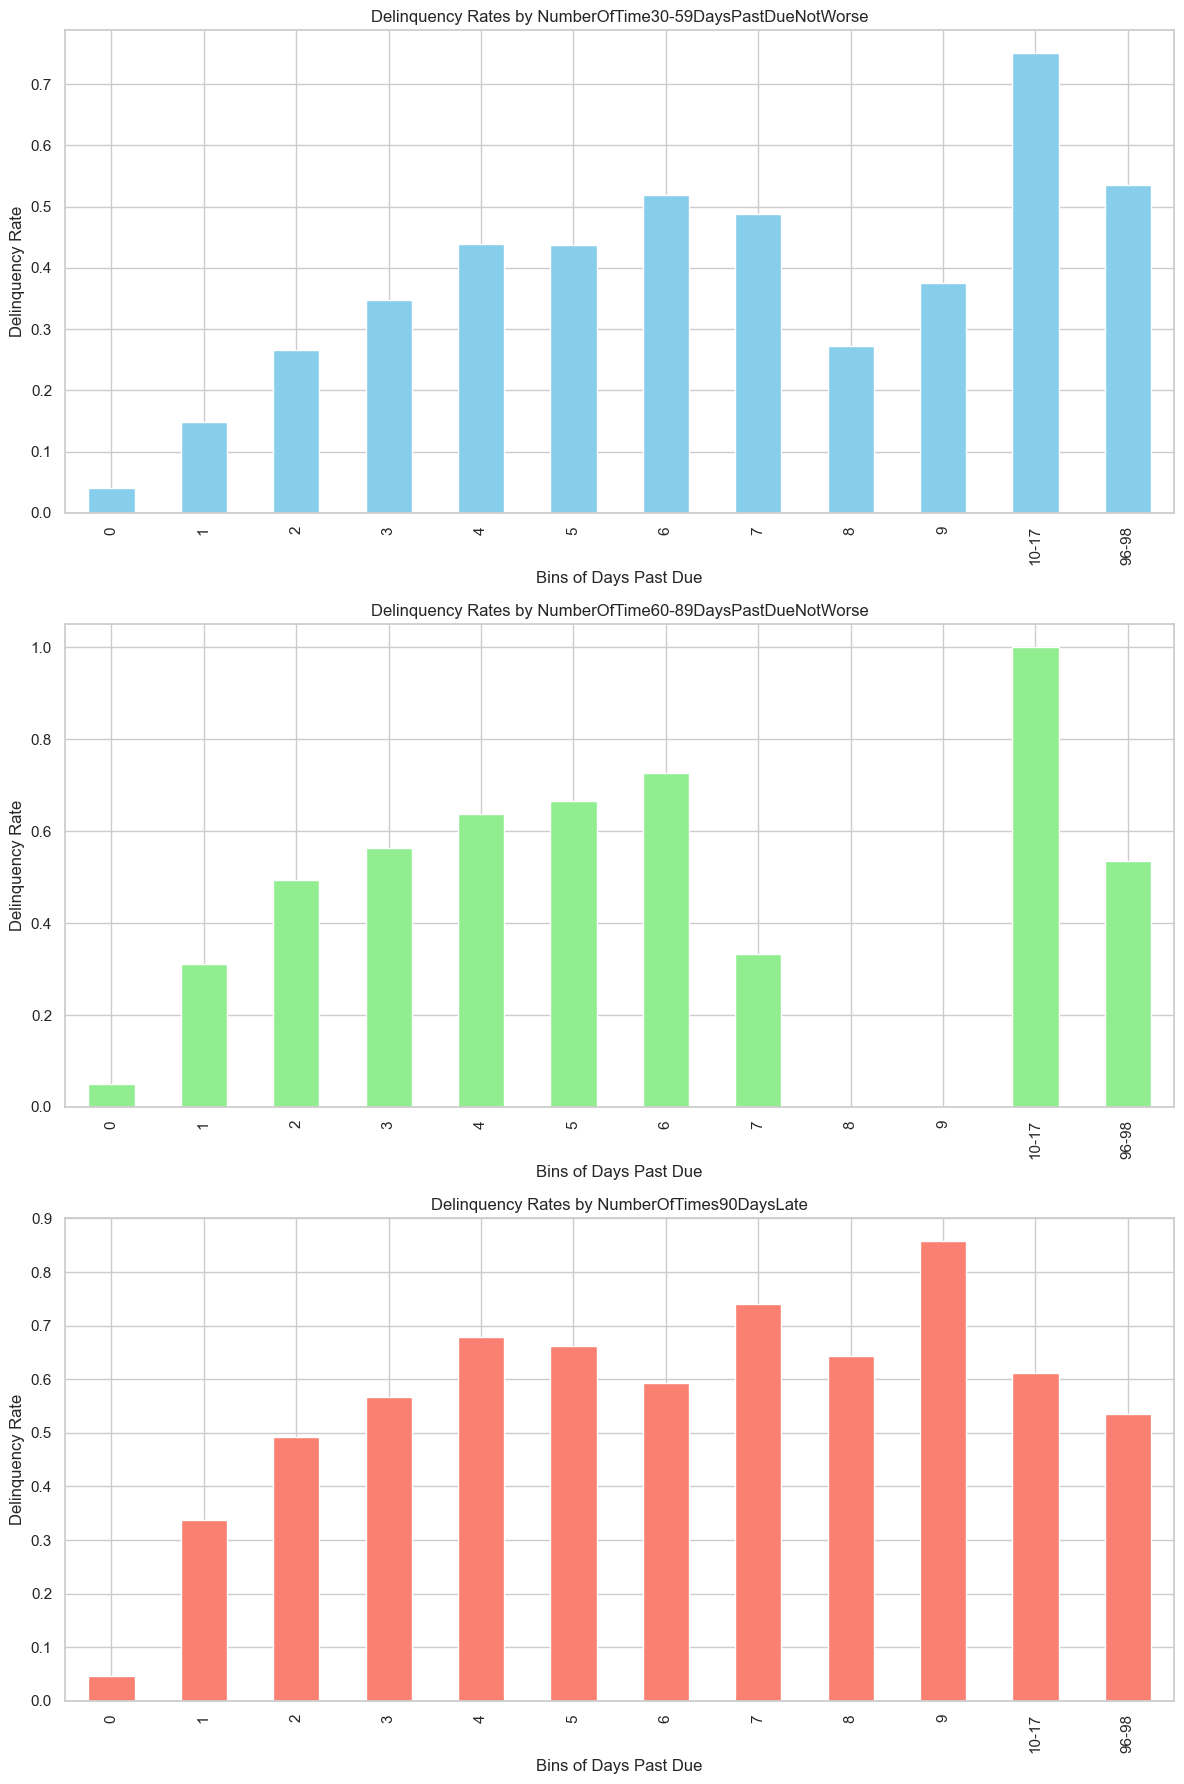

In [48]:
# Define the bins and labels with specified ranges
bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 17, 100]  # -1 to include 0 in the first bin
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10-17', '96-98']

# Apply the binning for each 'number of days' variable
df_train['Bins_30_59'] = pd.cut(df_train['NumberOfTime30-59DaysPastDueNotWorse'], bins=bins, labels=labels)
df_train['Bins_60_89'] = pd.cut(df_train['NumberOfTime60-89DaysPastDueNotWorse'], bins=bins, labels=labels)
df_train['Bins_90'] = pd.cut(df_train['NumberOfTimes90DaysLate'], bins=bins, labels=labels)

# Calculate delinquency rates for each bin
delinquency_rates_30_59 = df_train.groupby('Bins_30_59')['SeriousDlqin2yrs'].mean()
delinquency_rates_60_89 = df_train.groupby('Bins_60_89')['SeriousDlqin2yrs'].mean()
delinquency_rates_90 = df_train.groupby('Bins_90')['SeriousDlqin2yrs'].mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot for NumberOfTime30-59DaysPastDueNotWorse
delinquency_rates_30_59.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Delinquency Rates by NumberOfTime30-59DaysPastDueNotWorse')
axs[0].set_xlabel('Bins of Days Past Due')
axs[0].set_ylabel('Delinquency Rate')

# Plot for NumberOfTime60-89DaysPastDueNotWorse
delinquency_rates_60_89.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Delinquency Rates by NumberOfTime60-89DaysPastDueNotWorse')
axs[1].set_xlabel('Bins of Days Past Due')
axs[1].set_ylabel('Delinquency Rate')

# Plot for NumberOfTimes90DaysLate
delinquency_rates_90.plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Delinquency Rates by NumberOfTimes90DaysLate')
axs[2].set_xlabel('Bins of Days Past Due')
axs[2].set_ylabel('Delinquency Rate')

plt.tight_layout()
plt.show()

Looking at the distribution of the Delinquency Rate across different ranges of 'NumberOfTimeXDaysPastDueNotWorse', we can clearly see a positive association among the variables. Moreover, exhibiting extremely high values (96-98), tend to follow this pattern defaulting roughly at a 50% rate, way higher than the average. For this reason, we decided not to discard these observations but to substitute their values with the maximum among the non extreme ones, 17. This procedure will allow us to maintain the informativeness of the dataset increasing its robustness. 

In [49]:
columns_to_modify = [
    'NumberOfTime30-59DaysPastDueNotWorse', 
    'NumberOfTime60-89DaysPastDueNotWorse', 
    'NumberOfTimes90DaysLate'
]

# Apply the substitution for each column. In the test set, we substitute the outliers with the maximum taken from the training set
for column in columns_to_modify:
    # Find the maximum value in the column that is less than 90
    max_value_below_90_total = df_train[df_train[column] < 90][column].max()
    # Replace values greater than 90 with the found maximum
    df_train[column] = df_train[column].apply(lambda x: max_value_below_90_total if x > 90 else x)
    df_test[column] = df_test[column].apply(lambda x: max_value_below_90_total if x > 90 else x)

# The same goes for the 'df_copy_train' set. As for the validaion set, we use the same principle but we substitute the maximum value found in the df_copy_train set, to prevent data leakege. 

for column in columns_to_modify:
    # Find the maximum value in the column that is less than 90
    max_value_below_90 = df_copy_train[df_copy_train[column] < 90][column].max()
    # Replace values greater than 90 with the found maximum
    df_copy_train[column] = df_copy_train[column].apply(lambda x: max_value_below_90 if x > 90 else x)
    df_copy_val[column] = df_copy_val[column].apply(lambda x: max_value_below_90 if x > 90 else x)

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/940792030.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[column] = df_train[column].apply(lambda x: max_value_below_90_total if x > 90 else x)


Furthermore, we decided to combine the variables NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, and NumberOfTimes90DaysLate into a single weighted average metric. These variables are highly correlated as they measure similar aspects of payment behavior over consecutive periods. By consolidating them, we aimed to reduce multicollinearity, which can degrade model performance by making estimates overly sensitive to minor changes in input. The consolidated metric simplifies the feature set, making the model easier to manage and interpret. We assigned greater weights to longer-term delinquencies in the weighted average, reflecting their increased severity and predictability of financial distress. This approach aligns the metric closely with the underlying financial risk, enhancing the model's robustness and predictive accuracy.

In [50]:
weights = {
    'NumberOfTime30-59DaysPastDueNotWorse': 1,
    'NumberOfTime60-89DaysPastDueNotWorse': 2,
    'NumberOfTimes90DaysLate': 3
}

# Calculate the weighted average for each row
df_train['WeightedDelinquency'] = (
    df_train['NumberOfTime30-59DaysPastDueNotWorse'] * weights['NumberOfTime30-59DaysPastDueNotWorse'] +
    df_train['NumberOfTime60-89DaysPastDueNotWorse'] * weights['NumberOfTime60-89DaysPastDueNotWorse'] +
    df_train['NumberOfTimes90DaysLate'] * weights['NumberOfTimes90DaysLate']
) / sum(weights.values())

df_test['WeightedDelinquency'] = (
    df_test['NumberOfTime30-59DaysPastDueNotWorse'] * weights['NumberOfTime30-59DaysPastDueNotWorse'] +
    df_test['NumberOfTime60-89DaysPastDueNotWorse'] * weights['NumberOfTime60-89DaysPastDueNotWorse'] +
    df_test['NumberOfTimes90DaysLate'] * weights['NumberOfTimes90DaysLate']
) / sum(weights.values())

df_copy_train['WeightedDelinquency'] = (
    df_copy_train['NumberOfTime30-59DaysPastDueNotWorse'] * weights['NumberOfTime30-59DaysPastDueNotWorse'] +
    df_copy_train['NumberOfTime60-89DaysPastDueNotWorse'] * weights['NumberOfTime60-89DaysPastDueNotWorse'] +
    df_copy_train['NumberOfTimes90DaysLate'] * weights['NumberOfTimes90DaysLate']
) / sum(weights.values())

df_copy_val['WeightedDelinquency'] = (
    df_copy_val['NumberOfTime30-59DaysPastDueNotWorse'] * weights['NumberOfTime30-59DaysPastDueNotWorse'] +
    df_copy_val['NumberOfTime60-89DaysPastDueNotWorse'] * weights['NumberOfTime60-89DaysPastDueNotWorse'] +
    df_copy_val['NumberOfTimes90DaysLate'] * weights['NumberOfTimes90DaysLate']
) / sum(weights.values())

df_train.drop(columns=list(weights.keys()), inplace=True)
df_test.drop(columns=list(weights.keys()), inplace=True)

df_copy_train.drop(columns=list(weights.keys()), inplace=True)
df_copy_val.drop(columns=list(weights.keys()), inplace=True)


/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/5348031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['WeightedDelinquency'] = (
/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/5348031.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=list(weights.keys()), inplace=True)


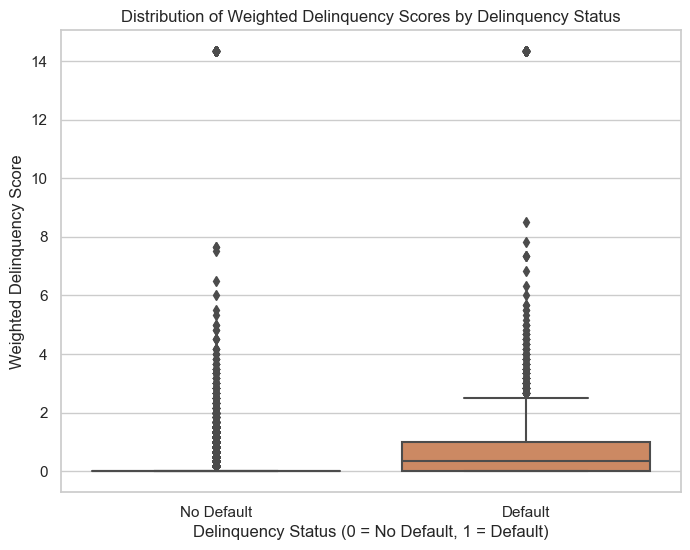

In [51]:
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='SeriousDlqin2yrs', y='WeightedDelinquency', data=df_train)

plt.title('Distribution of Weighted Delinquency Scores by Delinquency Status')
plt.xlabel('Delinquency Status (0 = No Default, 1 = Default)')
plt.ylabel('Weighted Delinquency Score')
plt.xticks([0, 1], ['No Default', 'Default'])  # Set the labels for clarity
plt.show()

The boxplot clearly shows that higher values of weighted deliquency scores are associated with higher Serious deliquency rates

---

# FEATURE ENGINEERING

To improve the information derived from our dataset, we introduced two binary variables: one indicating whether an individual is retired, and the other denoting ownership of more than two properties. The rationale behind these additions is that individuals who own multiple properties are generally viewed as more reliable by banks due to their substantial asset base. Similarly, identifying retirees helps explain instances of low or absent income.

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/1402257813.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['IsRetired'] = np.where((df_train['age'] > 65) & (df_train['MonthlyIncome'] < 1000), 1, 0)


Cross-tabulation between IsRetired and SeriousDlqin2yrs:
SeriousDlqin2yrs     0.0   1.0
IsRetired                     
0                 104356  7494
1                    452     8

Proportion of defaults:
SeriousDlqin2yrs       0.0       1.0
IsRetired                           
0                 0.933000  0.067000
1                 0.982609  0.017391


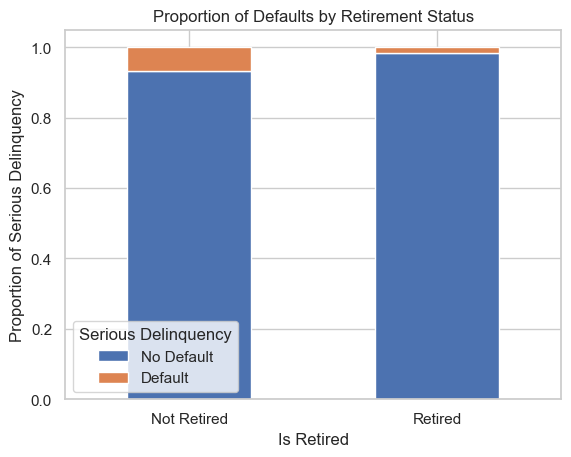

In [52]:
# IsRetired: A binary variable indicating whther a persin is retired or not

df_train['IsRetired'] = np.where((df_train['age'] > 65) & (df_train['MonthlyIncome'] < 1000), 1, 0)
df_test['IsRetired'] = np.where((df_test['age'] > 65) & (df_test['MonthlyIncome'] < 1000), 1, 0)

df_copy_train['IsRetired'] = np.where((df_copy_train['age'] > 65) & (df_copy_train['MonthlyIncome'] < 1000), 1, 0)
df_copy_val['IsRetired'] = np.where((df_copy_val['age'] > 65) & (df_copy_val['MonthlyIncome'] < 1000), 1, 0)

cross_tab = pd.crosstab(df_train['IsRetired'], df_train['SeriousDlqin2yrs'])
print("Cross-tabulation between IsRetired and SeriousDlqin2yrs:")
print(cross_tab)

prop_defaults = cross_tab.div(cross_tab.sum(axis=1), axis=0)
print("\nProportion of defaults:")
print(prop_defaults)

prop_defaults.plot(kind='bar', stacked=True)
plt.title('Proportion of Defaults by Retirement Status')
plt.xlabel('Is Retired')
plt.ylabel('Proportion of Serious Delinquency')
plt.xticks(ticks=[0, 1], labels=['Not Retired', 'Retired'], rotation=0)  # Assuming 0 = False, 1 = True
plt.legend(title='Serious Delinquency', labels=['No Default', 'Default'])
plt.show()

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/1727630974.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['hasMultipleRealEstates'] = np.where(df_train['NumberRealEstateLoansOrLines'] > 2, 1, 0)


Cross-tabulation between hasMultipleRealEstates and SeriousDlqin2yrs:
SeriousDlqin2yrs          0.0   1.0
hasMultipleRealEstates             
0                       98024  6862
1                        6784   640

Proportion of defaults:
SeriousDlqin2yrs             0.0       1.0
hasMultipleRealEstates                    
0                       0.934577  0.065423
1                       0.913793  0.086207


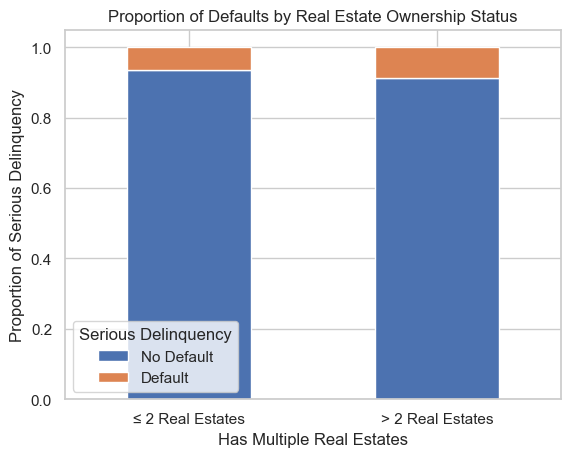

In [53]:
# We created a feature 'hasMultipleRealEstate', thinking that an individual with multiple real estate assest is less likely to be delinquent

df_train['hasMultipleRealEstates'] = np.where(df_train['NumberRealEstateLoansOrLines'] > 2, 1, 0)
df_test['hasMultipleRealEstates'] = np.where(df_test['NumberRealEstateLoansOrLines'] > 2, 1, 0)

df_copy_train['hasMultipleRealEstates'] = np.where(df_copy_train['NumberRealEstateLoansOrLines'] > 2, 1, 0)
df_copy_val['hasMultipleRealEstates'] = np.where(df_copy_val['NumberRealEstateLoansOrLines'] > 2, 1, 0)

cross_tab = pd.crosstab(df_train['hasMultipleRealEstates'], df_train['SeriousDlqin2yrs'])
print("Cross-tabulation between hasMultipleRealEstates and SeriousDlqin2yrs:")
print(cross_tab)

prop_defaults = cross_tab.div(cross_tab.sum(axis=1), axis=0)
print("\nProportion of defaults:")
print(prop_defaults)

prop_defaults.plot(kind='bar', stacked=True)
plt.title('Proportion of Defaults by Real Estate Ownership Status')
plt.xlabel('Has Multiple Real Estates')
plt.ylabel('Proportion of Serious Delinquency')
plt.xticks(ticks=[0, 1], labels=['≤ 2 Real Estates', '> 2 Real Estates'], rotation=0)  # Assuming 0 = False, 1 = True
plt.legend(title='Serious Delinquency', labels=['No Default', 'Default'])
plt.show()


# Correlation

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/174742010.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


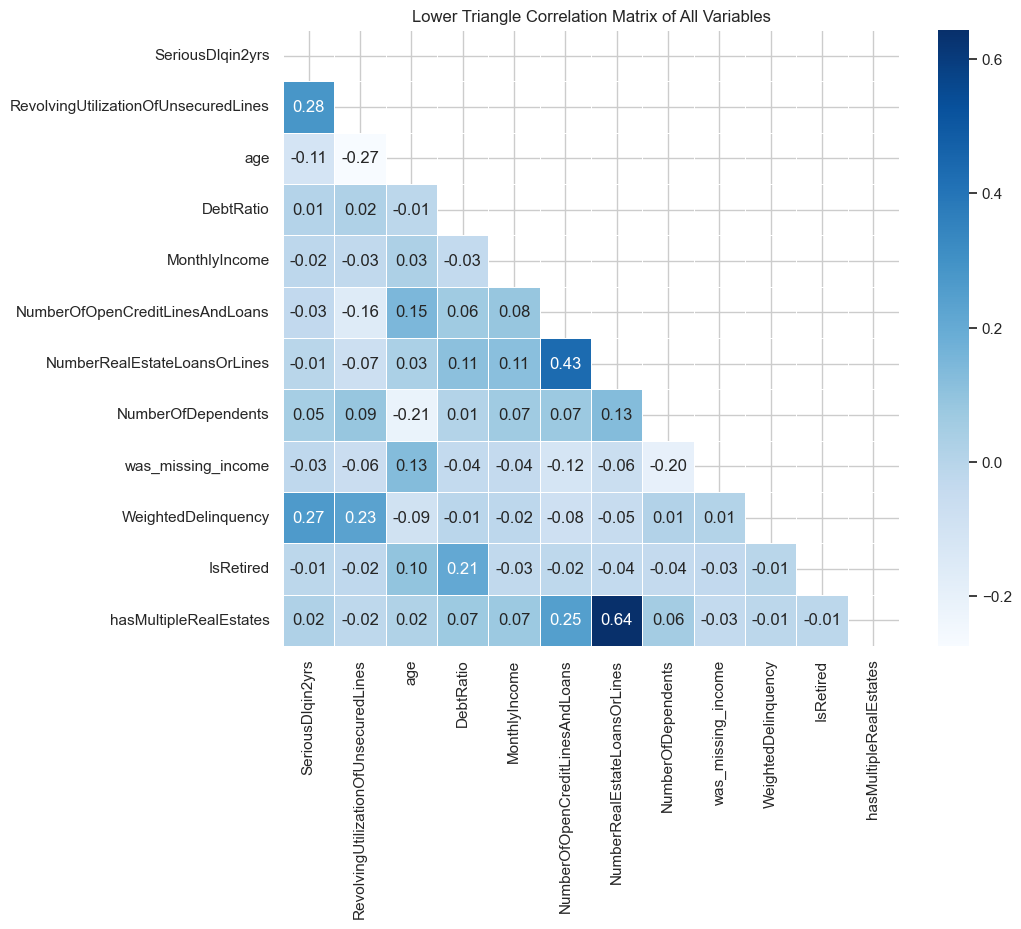

In [54]:
# Correlation matrix

corr_matrix = df_train.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='Blues',
            cbar=True, square=True, linewidths=.5)
plt.title('Lower Triangle Correlation Matrix of All Variables')
plt.show()

In [55]:
df_train.drop('Utilization_Range', axis=1, inplace=True)
df_train.drop('DebtRatio_Range', axis=1, inplace=True)
df_train.drop('Bins_30_59', axis=1, inplace=True)
df_train.drop('Bins_60_89', axis=1, inplace=True)
df_train.drop('Bins_90', axis=1, inplace=True)
df_train

/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/1099656474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('Utilization_Range', axis=1, inplace=True)
/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/1099656474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop('DebtRatio_Range', axis=1, inplace=True)
/var/folders/zh/5cthqzld1yd1_0h7jgdffqwm0000gn/T/ipykernel_37399/1099656474.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,was_missing_income,WeightedDelinquency,IsRetired,hasMultipleRealEstates
0,0.0,0.034949,59.0,0.004933,7959.688894,5.0,0.0,0.0,False,0.000000,0,0
1,0.0,0.155308,47.0,0.169612,5194.205470,6.0,1.0,0.0,True,0.000000,0,0
2,0.0,0.165166,62.0,0.020327,2851.722407,8.0,0.0,0.0,False,0.166667,0,0
3,0.0,0.010886,61.0,0.642979,1115.657341,6.0,1.0,0.0,False,0.000000,0,0
4,0.0,0.000717,49.0,0.693658,5194.205470,15.0,3.0,0.0,True,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
112495,0.0,0.008277,59.0,0.252965,6829.298430,5.0,2.0,0.0,False,0.000000,0,0
112496,0.0,0.054864,53.0,0.506413,4591.184178,8.0,1.0,2.0,False,0.166667,0,0
112497,1.0,0.209912,55.0,1.570573,1475.249007,8.0,3.0,0.0,False,0.000000,0,1
112498,0.0,0.004995,27.0,3.589018,580.772521,4.0,1.0,0.0,False,0.000000,0,0


In [56]:
df_test

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,was_missing_income,WeightedDelinquency,IsRetired,hasMultipleRealEstates
0,1.000000,60.0,0.573896,5279.341306,10.0,2.0,1.0,False,0.000000,0,0
1,0.111143,70.0,0.817315,4754.593041,24.0,3.0,0.0,True,0.000000,0,1
2,0.000000,41.0,0.601054,5194.205470,11.0,3.0,0.0,True,0.166667,0,1
3,0.005666,90.0,0.000366,5207.587042,1.0,0.0,0.0,False,0.000000,0,0
4,0.043647,60.0,0.226181,18678.143875,15.0,1.0,1.0,False,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
37495,0.006466,39.0,0.548070,6351.964584,11.0,2.0,2.0,False,0.666667,0,0
37496,0.008333,27.0,0.034056,6156.253999,6.0,0.0,0.0,False,0.000000,0,0
37497,0.448646,42.0,0.217342,1669.624435,4.0,0.0,0.0,False,0.000000,0,0
37498,0.123588,48.0,0.338560,8101.470792,5.0,2.0,3.0,False,0.000000,0,0


# Models

In [57]:
# Import of the needed libraries

from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler


Since we already divided our data into training and validation, we simply need to set them as training and testing sets. 

In [58]:
X_train = df_copy_train.drop('SeriousDlqin2yrs', axis=1)  # Drop the target variable to isolate features
y_train = df_copy_train['SeriousDlqin2yrs']  # Target variable from the training set

# Select features and target for the validation set
X_test = df_copy_val.drop('SeriousDlqin2yrs', axis=1)  # Drop the target variable to isolate features
y_test = df_copy_val['SeriousDlqin2yrs'] 

In order to ensure consistency, since some of our models involved randomness, we decided to run the models for 'epochs' number of times averaging the obtained results. 

Before deploying our models, we need to take into account a crucial consideration. As we noticed, our target variable is highly unbalanced (roughly 7% of individuals are deliquent). 
This disparity in frequence influences learning algorithms to 'ignore' the delinquent class, minimise the loss function by always guessing '0', i.e. not delinquent. In particular, always guessing 0 will lead to an accuracy of 93%, but our algorithm will be mostly useless to financial institutions. 
Having considered that, we will focus on different metrics to assess the performance of our models:

• ROC_AUC metric is crucial as it captures the trade off between 'True positives rate' and 'True Negative rate' across all possible thresholds. This ensures a way of properly assessing the model performance even for unbalanced datsets, providing a measure of the discriminative ability of the model. 

• Recall Metric (Sensitivity): The true posivire rate, measures how many deliquent individuals are actually identified. Depends on the threshold used. 

• Precision Metric: measures the proportion of Deliquents properly identified between the ones flagged as Defaulters, implies a trade off with recall and depends on the threshold. 

• F1-Score: Measuring the balance between Recall and Precision


MODELS USED: 

LOGISTIC REGRESSION\
Logistic regression serves as the baseline for our study on financial distress prediction. It models the probability of distress using the variables of our dataset as predictors within a logistic function, valued for its simplicity and interpretability.  Although the model demonstrated high accuracy, this metric was misleading due to the unbalanced nature of our data.

ENSEMBLE METHODS\
We decided to use ensemble methods (XGBoost, AdaBoost, Random Forest) as they are highly effective for this type of objective due to their ability to improve prediction accuracy and robustness by combining multiple models. They effectively handle imbalanced datasets, like ours, and provide insights into feature importance, which aids in focusing on significant predictors. This approach is crucial for achieving stable and reliable predictions in scenarios where the cost of errors can be substantial.


# Vanilla Models

We started off by deploying 4 classification models, looking for a benchmark to use after having performed tuning and having applied more advanced techniques. 

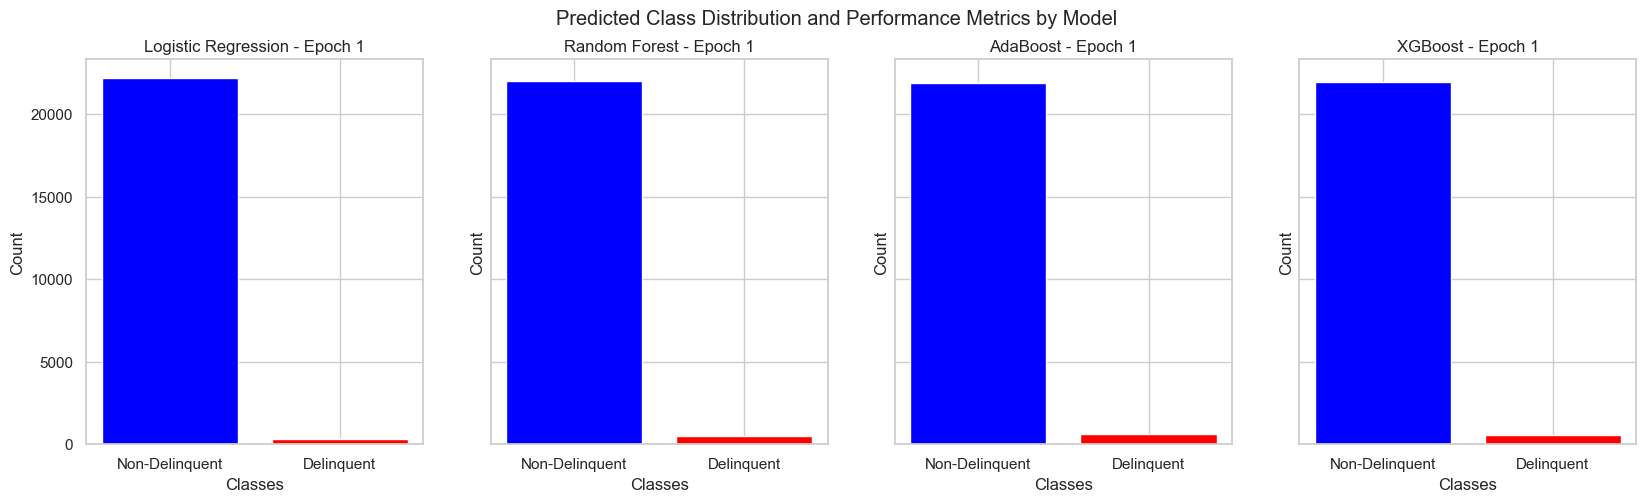

,Accuracy,Precision,Recall,F1 Score,ROC-AUC,Model
0,0.936844,0.538194,0.107415,0.179087,0.833770,vanilla_Logistic Regression
1,0.937081,0.526828,0.185262,0.274118,0.840528,vanilla_Random Forest
2,0.937822,0.534483,0.236313,0.327727,0.862959,vanilla_AdaBoost
3,0.938044,0.544954,0.205821,0.298793,0.853180,vanilla_XGBoost


In [59]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Function to train models, compute metrics, and visualize predictions
def run_models_and_visualize_predictions(epochs=3):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    fig.suptitle('Predicted Class Distribution and Performance Metrics by Model')

    # Store results for all epochs
    epoch_results = {name: [] for name in models.keys()}
    
    for _ in range(epochs):
        for idx, (name, model) in enumerate(models.items()):
            # Fit the model directly without any scaling or SMOTE
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_pred_prob = model.predict_proba(X_test)[:, 1]

            # Calculate metrics
            metrics = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_pred_prob)
            }
            
            # Append the metrics to the results for averaging later
            epoch_results[name].append(metrics)

            # Visualization of predicted classes for the current epoch
            unique, counts = np.unique(y_pred, return_counts=True)
            axes[idx].cla() 
            axes[idx].bar(unique, counts, color=['blue', 'red'])
            axes[idx].set_title(f"{name} - Epoch {_+1}")
            axes[idx].set_xticks(unique)
            axes[idx].set_xticklabels(['Non-Delinquent', 'Delinquent'])
            axes[idx].set_xlabel('Classes')
            axes[idx].set_ylabel('Count')

        plt.pause(0.1) 

    plt.show()

    # Calculate the average results across all epochs for each model
    average_results = []
    for name, results in epoch_results.items():
        # Calculate the mean of each metric
        averaged_metrics = {metric: np.mean([result[metric] for result in results]) for metric in results[0]}
        averaged_metrics['Model'] = name
        average_results.append(averaged_metrics)

    return pd.DataFrame(average_results)

results_df_vanilla = run_models_and_visualize_predictions()
results_df_vanilla['Model'] = 'vanilla_' + results_df_vanilla['Model'].astype(str)
results_df_vanilla

Our models don't perform as we wish, they are mostly predicting that an individual will not default. This is a consequence of the unbalanced datset, resulting in this models not to be performative with a standard threshold of 0.5. However, they display encouraging ROC-AUC values, meaning that with the right threshold for the classification decision the models will perform better.

# Scaling + Weighting techiques

• Scaling: The available features are varied in scale and distribution, using a scaler as the 'StandardScaler' or 'RobustScaler' ensures that features with a higher range don't dominate the feature space, leading the learning algorithm to ignore the lower range features. Moreover, some algorithms (such as LogisticRegression) benefit from feature scaling since it uses GradientDescent, leading to faster convergence. Due to the high incidence of outliers and skewed variables in our dataset, we decided to use RobustScaler as it uses the median and IQR for scaling. On the other hand, tree-based models don't benefit much from scaling as they're scale invariant, we hence don't expect much progress for those models. 

• Weighting: As previously mentioned, our target variable is highly unbalanced. For this reason, we decided to test a simple strategy for incresing the importance of the minority class, weighting. This will lead to an higher weight being given to the instances of the 'deliquent' class, possibly improving performances metrics as recall of the minority class. 

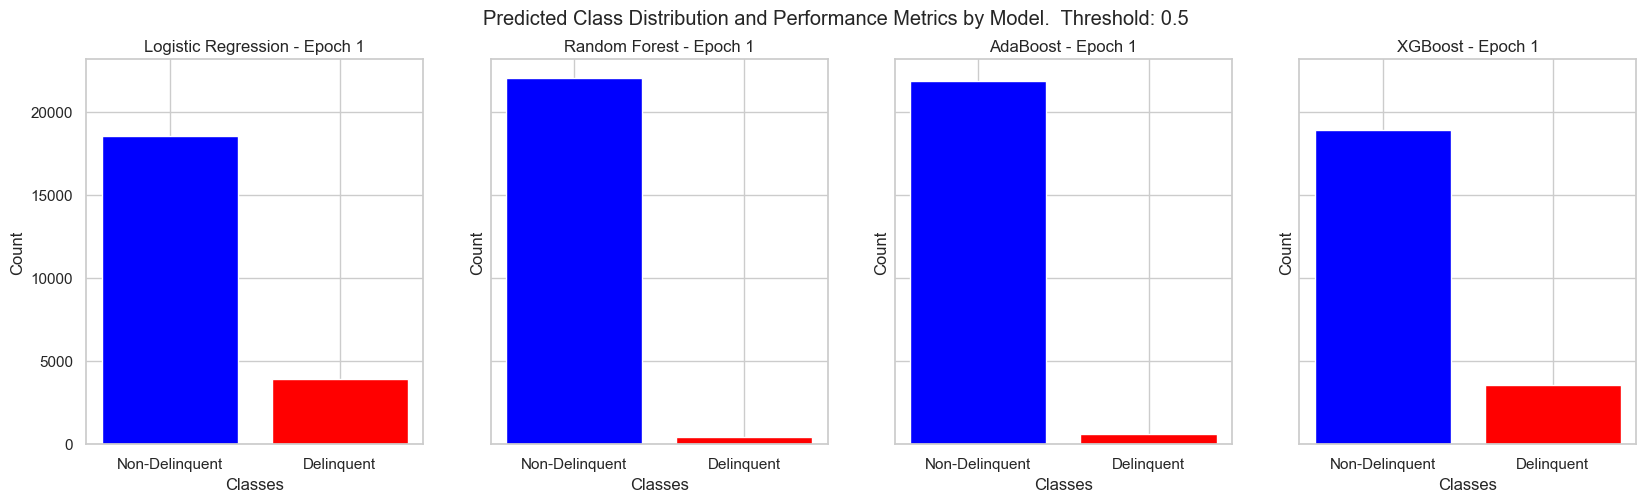

   Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  0.846800   0.245427  0.669439  0.359175  0.855550   
1  0.937496   0.544316  0.156156  0.242672  0.840889   
2  0.937822   0.534483  0.236313  0.327727  0.862959   
3  0.857867   0.254957  0.632710  0.363455  0.845927   

                             Model  
0  scal_weight_Logistic Regression  
1        scal_weight_Random Forest  
2             scal_weight_AdaBoost  
3              scal_weight_XGBoost  


In [60]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight={0: 1, 1: 10}),
    'Random Forest': RandomForestClassifier(class_weight={0: 1, 1: 10}),
    'AdaBoost': AdaBoostClassifier(),  # AdaBoost does not support class_weight directly
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=10)
}

# Set up the scaler
scaler = RobustScaler()

# Function to train models, compute metrics, and visualize predictions
def run_models_and_visualize_predictions(epochs=3):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    fig.suptitle('Predicted Class Distribution and Performance Metrics by Model.  Threshold: 0.5')

    # Store results for all epochs
    epoch_results = {name: [] for name in models.keys()}
    
    for _ in range(epochs):
        for idx, (name, model) in enumerate(models.items()):
            # Fit the model with scaling
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
            y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

            # Calculate metrics
            metrics = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_pred_prob)
            }
            
            # Append the metrics to the results for averaging later
            epoch_results[name].append(metrics)

            # Visualization of predicted classes for the current epoch
            unique, counts = np.unique(y_pred, return_counts=True)
            axes[idx].cla()  # Clear the current axis to redraw
            axes[idx].bar(unique, counts, color=['blue', 'red'])
            axes[idx].set_title(f"{name} - Epoch {_+1}")
            axes[idx].set_xticks(unique)
            axes[idx].set_xticklabels(['Non-Delinquent', 'Delinquent'])
            axes[idx].set_xlabel('Classes')
            axes[idx].set_ylabel('Count')

        plt.pause(0.1) 

    plt.show()

    # Calculate the average results across all epochs for each model
    average_results = []
    for name, results in epoch_results.items():
        # Calculate the mean of each metric
        averaged_metrics = {metric: np.mean([result[metric] for result in results]) for metric in results[0]}
        averaged_metrics['Model'] = name
        average_results.append(averaged_metrics)

    return pd.DataFrame(average_results)

# Assuming X_train, y_train, X_test, and y_test are defined
results_df_scal_weight = run_models_and_visualize_predictions()
results_df_scal_weight['Model'] = 'scal_weight_' + results_df_scal_weight['Model'].astype(str)
print(results_df_scal_weight)

As expected, Scaling improves the performance of LogisticRegression, while the improvement in XGBoost is primarely due to the higher weight given to the minority class. 
From the Precision and Recall metrics, we can see that while RandomForest and Adaboost kept the number of predicted '1' (i.e. predicted defaulters) low focusing on precision, LogisticRegression and XGBoost were incentivized by the weighting to increase the number of predicted defaulters, possibly at the cost of some precision. 
In particular, roughly half of the Delinquents predicted by AdaBoost and RandomForest were true defaulters, while LogisticRegression and XGBoost were correct in about 25% of the cases. On the other hand, thanks to the higher number of predicted defaulter, the latter models were about to identify more true defaulters in absolute terms. 

# SMOTE: Synthetic Minority Over-sampling Technique

We then decided to apply the SMOTE technique to the models, which is an oversampling technique consisting in creating synthetic instances of the minority class, aiming to improve generalisation and balance across the target variable. The synthetic observations are created starting from the original instances of the minority class and identifying its neighbours, subsequntly SMOTE randomly selects one of this neighbours and creates an instances of the minority class. Despite its strenghs, SMOTE is prone to amplify noise of the minority class, possibly creating noisy synthetic observations coming from an outlier in target variable. 

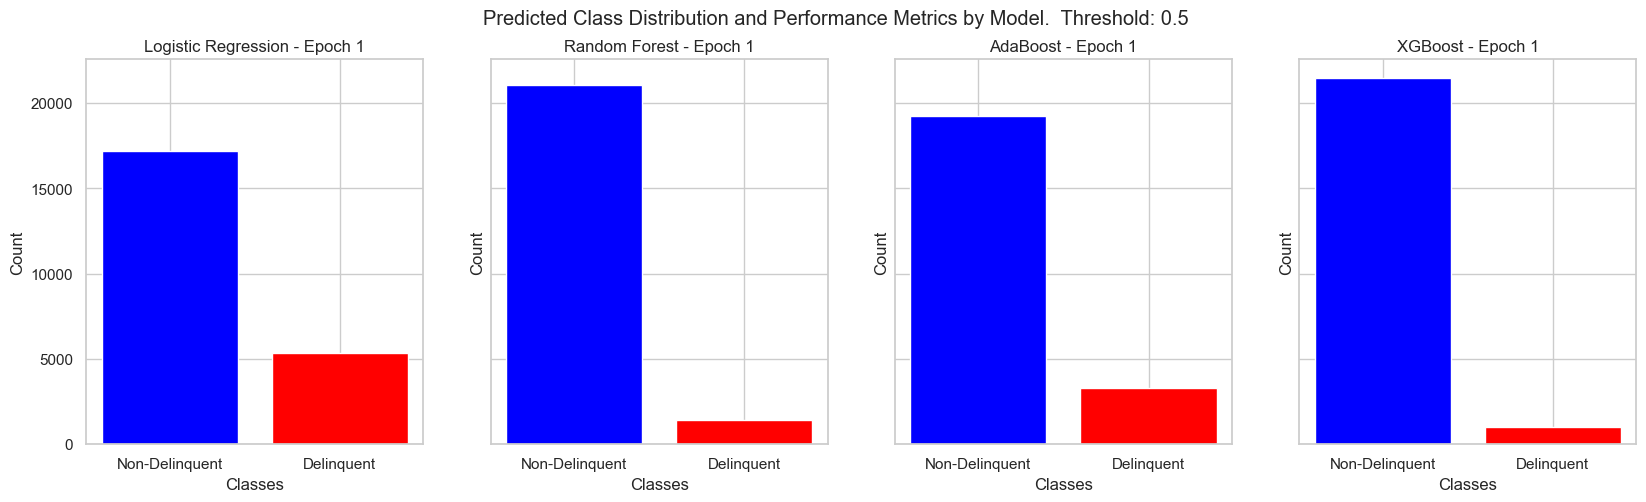

   Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  0.795867   0.204503  0.755371  0.321866  0.855994   
1  0.920385   0.378594  0.376299  0.377437  0.835952   
2  0.869867   0.273421  0.620929  0.379661  0.852930   
3  0.932133   0.457916  0.316701  0.374437  0.845614   

                             Model  
0  scal_weight_Logistic Regression  
1        scal_weight_Random Forest  
2             scal_weight_AdaBoost  
3              scal_weight_XGBoost  


In [61]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Set up the scaler and SMOTE
scaler = RobustScaler()

# Function to train models, compute metrics, and visualize predictions
def run_models_and_visualize_predictions(epochs=3):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    fig.suptitle('Predicted Class Distribution and Performance Metrics by Model.  Threshold: 0.5')

    # Store results for all epochs
    epoch_results = {name: [] for name in models.keys()}
    
    for _ in range(epochs):
        for idx, (name, model) in enumerate(models.items()):
            # Pipeline for scaling, SMOTE, and model training
            pipeline = Pipeline([
                ('scaler', scaler),
                ('smote', SMOTE(random_state=42)),
                ('model', model)
            ])
            
            # Fit the model
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

            # Calculate metrics
            metrics = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_pred_prob)
            }
            
            # Append the metrics to the results for averaging later
            epoch_results[name].append(metrics)

            # Visualization of predicted classes for the current epoch
            unique, counts = np.unique(y_pred, return_counts=True)
            axes[idx].cla()  # Clear the current axis to redraw
            axes[idx].bar(unique, counts, color=['blue', 'red'])
            axes[idx].set_title(f"{name} - Epoch {_+1}")
            axes[idx].set_xticks(unique)
            axes[idx].set_xticklabels(['Non-Delinquent', 'Delinquent'])
            axes[idx].set_xlabel('Classes')
            axes[idx].set_ylabel('Count')

        plt.pause(0.1)  # Pause to update the plots dynamically

    plt.show()

    # Calculate the average results across all epochs for each model
    average_results = []
    for name, results in epoch_results.items():
        # Calculate the mean of each metric
        averaged_metrics = {metric: np.mean([result[metric] for result in results]) for metric in results[0]}
        averaged_metrics['Model'] = name
        average_results.append(averaged_metrics)

    return pd.DataFrame(average_results)

# Assuming X_train, y_train, X_test, and y_test are defined
results_df_smote = run_models_and_visualize_predictions()
results_df_smote['Model'] = 'scal_weight_' + results_df_smote['Model'].astype(str)
print(results_df_smote)

Resulting from the oversampling approach, Logistic Regression increased the number of predicted Deliquents up to 5000, boosting the Recall metric and identifying the highest amount of deliquents so far. However, this comes at the cost of the precision, only 1 out of 5 predicted deliquents turned out to be an actual deliquent. 
On the other hand, AdaBoost improved its performance by correctly identifying 62% of deliquents, being correct in 3 out of 10 cases in which it flagged an individual as deliquent. 

As we can clearly see, despite weighting and oversampling theoretically serving the same purpose, which is increasing the importance of the minority class, in practice algorithms respond differently based of the technique used. 

# Undersampling

Moreover, we also tried the counterpart of oversampling: undersampling. This method: 'RandomUnderSampler' randomly eliminates instances of the majority class, hopefully reducting performance issues caused by unbalancedeness.

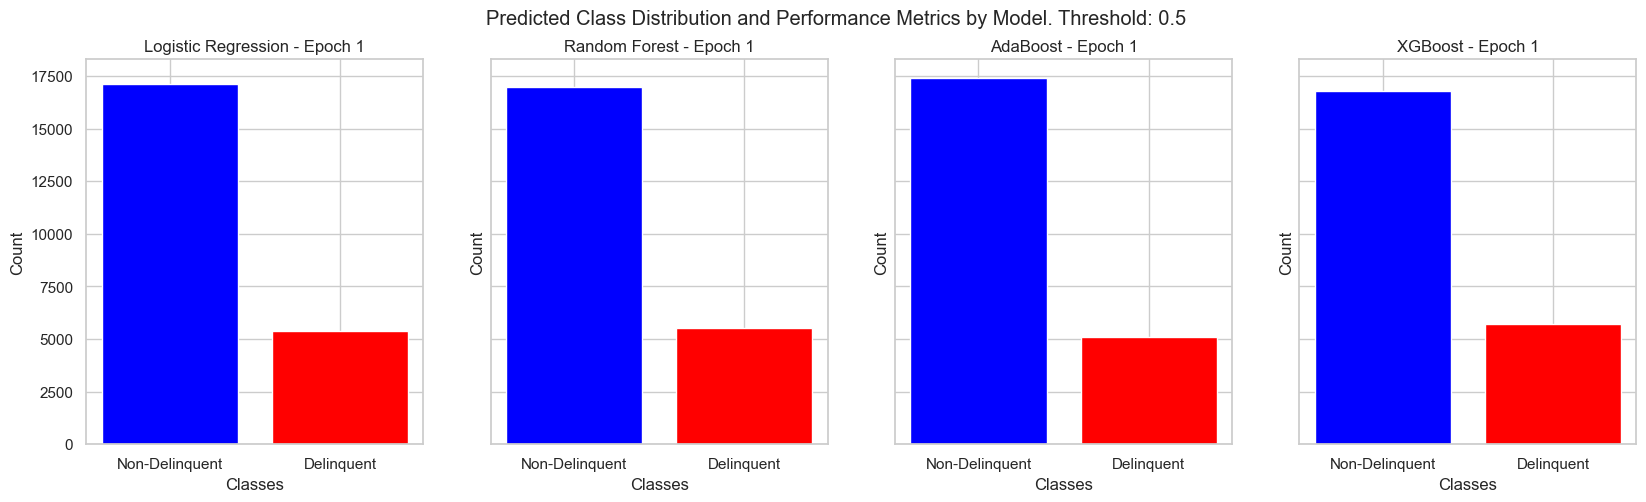

   Accuracy  Precision    Recall  F1 Score   ROC-AUC  \
0  0.792178   0.200593  0.750520  0.316574  0.855286   
1  0.788030   0.199121  0.762763  0.315800  0.851889   
2  0.807422   0.215327  0.757450  0.335328  0.862216   
3  0.780044   0.192672  0.761608  0.307542  0.846910   

                             Model  
0  scal_weight_Logistic Regression  
1        scal_weight_Random Forest  
2             scal_weight_AdaBoost  
3              scal_weight_XGBoost  


In [62]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Set up the scaler and Random Under Sampler
scaler = RobustScaler()
random_under_sampler = RandomUnderSampler(random_state=42)

# Function to train models, compute metrics, and visualize predictions
def run_models_and_visualize_predictions(epochs=3):
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
    fig.suptitle('Predicted Class Distribution and Performance Metrics by Model. Threshold: 0.5')

    # Store results for all epochs
    epoch_results = {name: [] for name in models.keys()}
    
    for _ in range(epochs):
        for idx, (name, model) in enumerate(models.items()):
            # Pipeline for scaling, Random Under Sampling, and model training
            pipeline = Pipeline([
                ('scaler', scaler),
                ('random_under_sampler', random_under_sampler),
                ('model', model)
            ])
            
            # Fit the model
            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)
            y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

            # Calculate metrics
            metrics = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred),
                'Recall': recall_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'ROC-AUC': roc_auc_score(y_test, y_pred_prob)
            }
            
            # Append the metrics to the results for averaging later
            epoch_results[name].append(metrics)

            # Visualization of predicted classes for the current epoch
            unique, counts = np.unique(y_pred, return_counts=True)
            axes[idx].cla()  
            axes[idx].bar(unique, counts, color=['blue', 'red'])
            axes[idx].set_title(f"{name} - Epoch {_+1}")
            axes[idx].set_xticks(unique)
            axes[idx].set_xticklabels(['Non-Delinquent', 'Delinquent'])
            axes[idx].set_xlabel('Classes')
            axes[idx].set_ylabel('Count')

        plt.pause(0.1)  

    plt.show()

    # Calculate the average results across all epochs for each model
    average_results = []
    for name, results in epoch_results.items():
        # Calculate the mean of each metric
        averaged_metrics = {metric: np.mean([result[metric] for result in results]) for metric in results[0]}
        averaged_metrics['Model'] = name
        average_results.append(averaged_metrics)

    return pd.DataFrame(average_results)

# Assuming X_train, y_train, X_test, and y_test are defined
results_df_undersampl = run_models_and_visualize_predictions()
results_df_undersampl['Model'] = 'scal_weight_' + results_df_undersampl['Model'].astype(str)
print(results_df_undersampl)

# Threshold optimization

For each model we could optimize the threshold to maximize max average recall, to correctly classify about 80% of delinquents and of non-delinquents of the test set at the expense of classification accuracy. However, our goal is to accurately predict the probability of default so that financial institutions can independently decide the threshold to use depending on their risk aversion profile

# Models Comparison

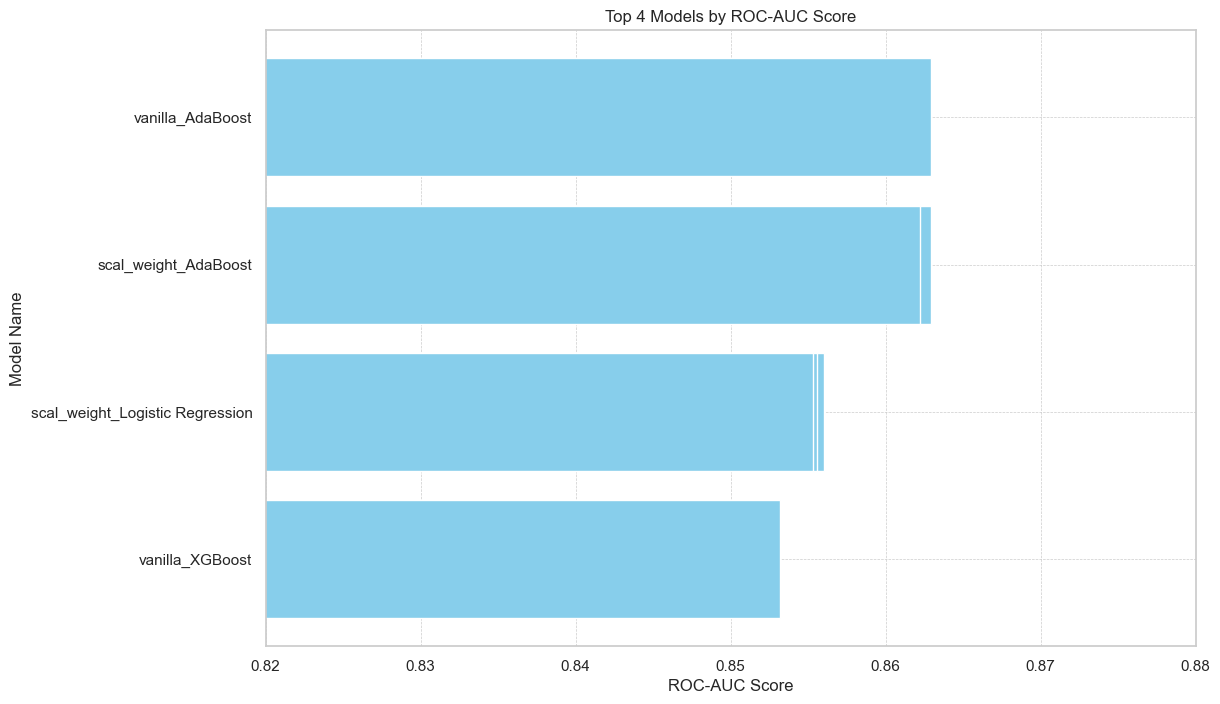

In [63]:
df_concatenated = pd.concat([results_df_vanilla, results_df_scal_weight,  results_df_smote, results_df_undersampl], axis=0, ignore_index=True)
sorted_df = df_concatenated.sort_values('ROC-AUC', ascending=False)

# Select the top 4 entries
top_8_models = sorted_df.head(7)

plt.figure(figsize=(12, 8))  # Set a larger figure size for better readability

# Create a horizontal bar plot
plt.barh(top_8_models['Model'], top_8_models['ROC-AUC'], color='skyblue')

# Set labels and title
plt.xlabel('ROC-AUC Score')  # Label for the x-axis
plt.ylabel('Model Name')  # Label for the y-axis
plt.title('Top 4 Models by ROC-AUC Score')  # Title of the plot

# Adjust the x-axis limits to zoom in more closely on the range where the scores differ
plt.xlim(0.82, 0.88)  # Adjust the range as needed based on the minimum and maximum ROC-AUC scores

# Invert the y-axis to show the highest score on top
plt.gca().invert_yaxis()

# Optionally, add grid lines for better precision viewing
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

# AdaBoost Tuning

Let's now improve AdaBoost. Tuning the number of sequential trees to be built along with the contribution of each tree could be crucial for model performance

In [64]:
pipeline = ImPipeline([
    ('scaler', RobustScaler()),
    ('under_sampler', RandomUnderSampler(random_state=42)),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 1.0]
}

# Setup the GridSearchCV with ROC-AUC scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', RobustScaler()),
                                       ('under_sampler',
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 1.0],
                         'classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [65]:
# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (ROC-AUC): {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set using ROC-AUC
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
print("Test set ROC-AUC: {:.2f}".format(roc_auc_score(y_test, y_pred_proba)))
print("Test set Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

Best parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 200}
Best cross-validation score (ROC-AUC): 0.86
Test set ROC-AUC: 0.87
Test set Accuracy: 0.81


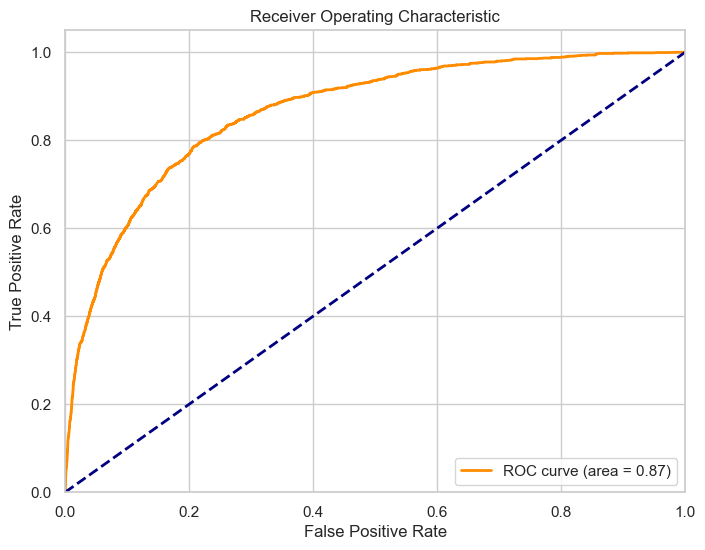

In [66]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

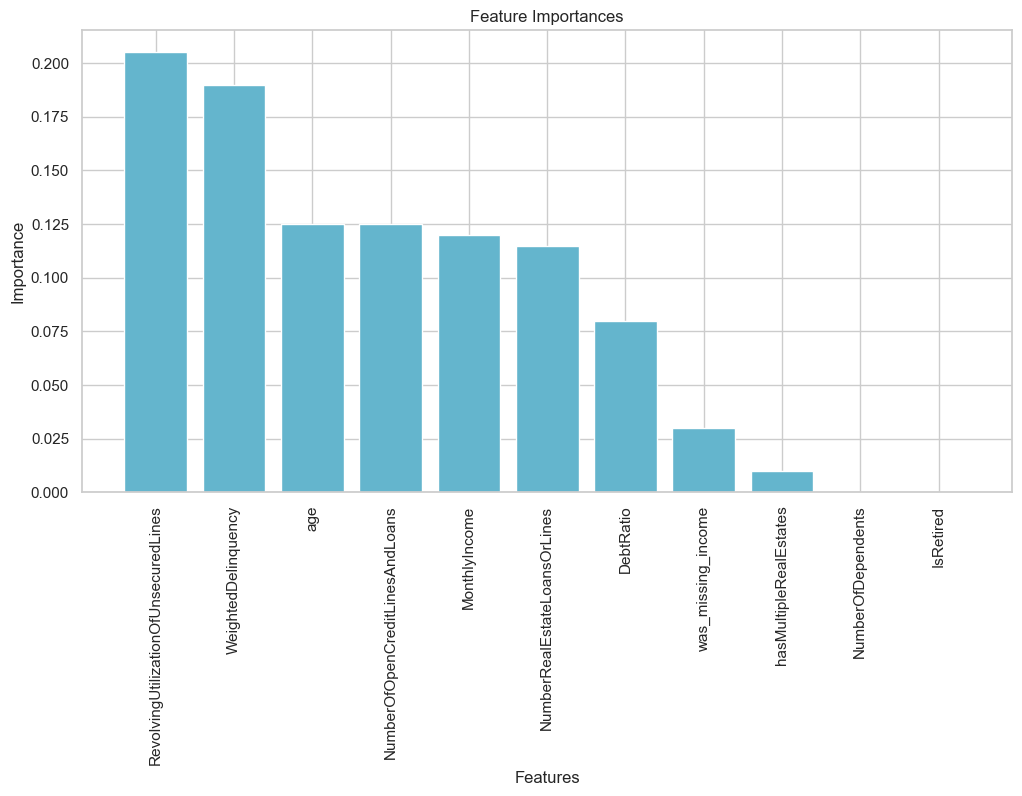

In [67]:
feature_importances = best_model.named_steps['classifier'].feature_importances_
features = X_train.columns 


importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances = importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(importances['Feature'], importances['Importance'], color='c')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.show()

AdaBoost greately benefits from the hyperparameters tuning, resulting in a 0.87 ROC on the unseen validation set. This is the best result achieved so far. 

# XGBoost Tuning

In [68]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Define the parameter grid
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.5],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='roc_auc', verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (ROC-AUC): {:.2f}".format(grid_search.best_score_))

# Get the best model
best_model = grid_search.best_estimator_

# Predict probabilities and calculate ROC AUC
y_pred = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'classifier__colsample_bytree': 1, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1}
Best cross-validation score (ROC-AUC): 0.86


In [69]:
print('ROC_AUC score: ', roc_auc)

ROC_AUC score:  0.8651976414478195


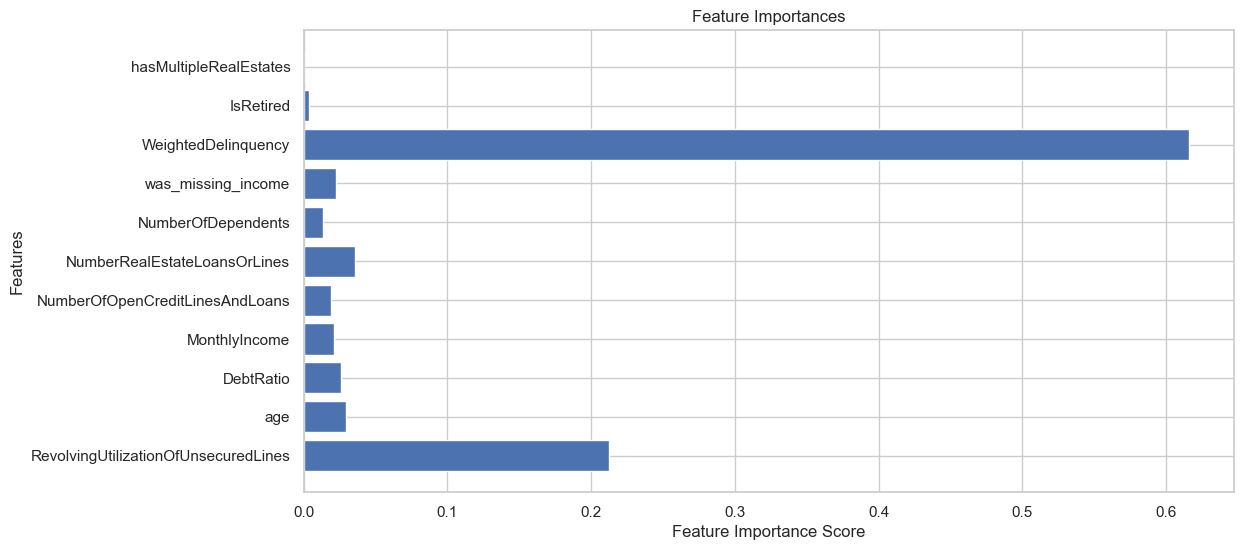

In [70]:
feature_importances = best_model.named_steps['classifier'].feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

As we can see, our model mainly benefits from 2 informations, Weighted Deliquency and RevolvingUtilizationOfUnsecuredLines. For this reason, let's see if we can make our model simpler using PCA.

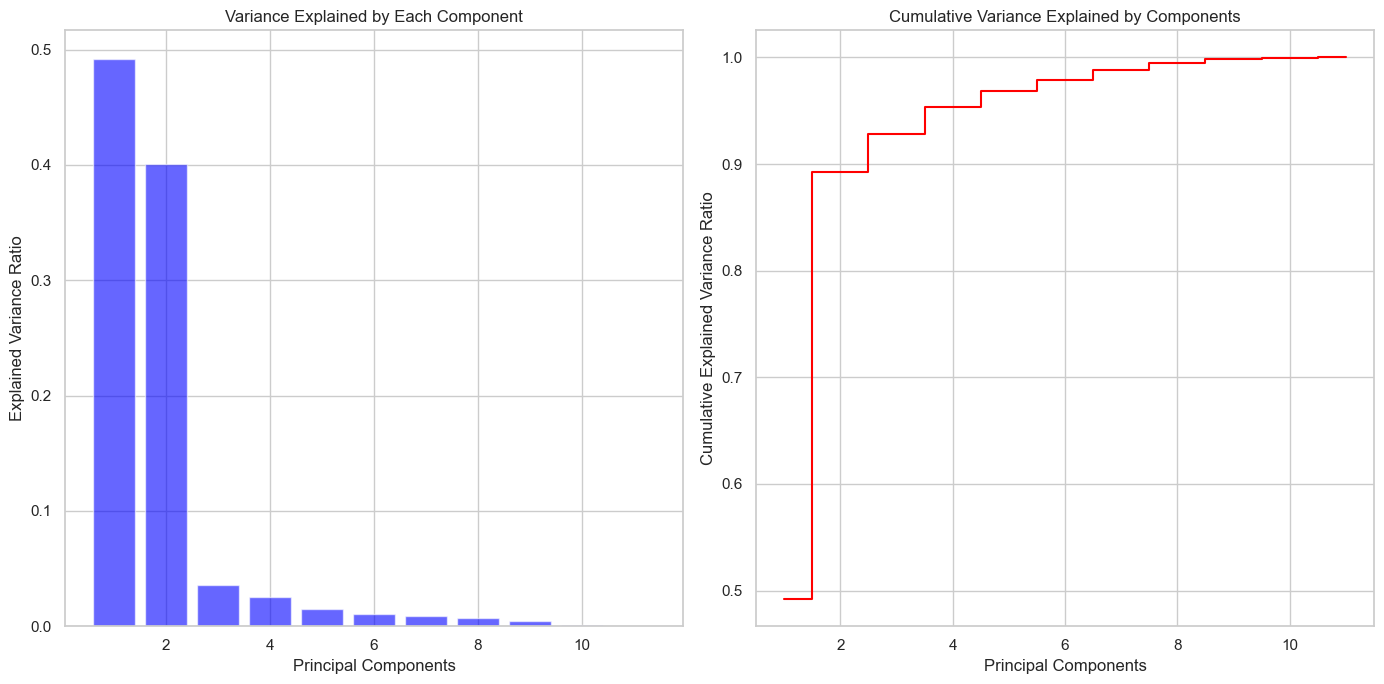

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best parameters with PCA: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 7, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8, 'pca__n_components': 0.95}
Best cross-validation score with PCA (ROC-AUC): 0.80


In [71]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_train) 

# Fit PCA to the scaled data
pca = PCA()
pca.fit(X_scaled)

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Number of components
n_components = np.arange(len(explained_variance_ratio)) + 1

plt.figure(figsize=(14, 7))

# Plotting the explained variance for each component
plt.subplot(1, 2, 1)
plt.bar(n_components, explained_variance_ratio, color='blue', alpha=0.6, label='Individual Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Each Component')
plt.grid(True)

# Plotting the cumulative explained variance
plt.subplot(1, 2, 2)
plt.step(n_components, cumulative_variance, where='mid', label='Cumulative Explained Variance', color='red')
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Variance Explained by Components')
plt.grid(True)

plt.tight_layout()
plt.show()

pipeline_with_pca = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=0.95)),  
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Define parameter grid
param_grid_with_pca = {
    'classifier__n_estimators': [100, 300],
    'classifier__learning_rate': [0.01, 0.5],
    'classifier__max_depth': [3, 5, 7],
    'classifier__subsample': [0.8, 1],
    'classifier__colsample_bytree': [0.8, 1],
    'pca__n_components': [0.95, 0.85]  
}

# Setup and run GridSearchCV
grid_search_with_pca = GridSearchCV(pipeline_with_pca, param_grid_with_pca, cv=3, scoring='roc_auc', verbose=1)
grid_search_with_pca.fit(X_train, y_train)

print("Best parameters with PCA:", grid_search_with_pca.best_params_)
print("Best cross-validation score with PCA (ROC-AUC): {:.2f}".format(grid_search_with_pca.best_score_))

From the above results, we can clearly see that most of the variance can be explained using a small number of features, possibly leaving space to benefit from the dimensionality reduction. However, one needs to be aware of the downside of this approach, which favours model simplicity and computational efficiency over performance and explanatory capabilities. 

Let's now train our performing model, AdaBoost, on the whole training set ( without dividing it in 80-20 training-validation). We will then use the newly trained model on the given Test set to predict the final probabilities. 

In [72]:
df_test

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,was_missing_income,WeightedDelinquency,IsRetired,hasMultipleRealEstates
0,1.000000,60.0,0.573896,5279.341306,10.0,2.0,1.0,False,0.000000,0,0
1,0.111143,70.0,0.817315,4754.593041,24.0,3.0,0.0,True,0.000000,0,1
2,0.000000,41.0,0.601054,5194.205470,11.0,3.0,0.0,True,0.166667,0,1
3,0.005666,90.0,0.000366,5207.587042,1.0,0.0,0.0,False,0.000000,0,0
4,0.043647,60.0,0.226181,18678.143875,15.0,1.0,1.0,False,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
37495,0.006466,39.0,0.548070,6351.964584,11.0,2.0,2.0,False,0.666667,0,0
37496,0.008333,27.0,0.034056,6156.253999,6.0,0.0,0.0,False,0.000000,0,0
37497,0.448646,42.0,0.217342,1669.624435,4.0,0.0,0.0,False,0.000000,0,0
37498,0.123588,48.0,0.338560,8101.470792,5.0,2.0,3.0,False,0.000000,0,0


In [73]:
pipeline = ImPipeline([
    ('scaler', RobustScaler()),
    ('under_sampler', RandomUnderSampler(random_state=42)),
    ('classifier', AdaBoostClassifier(random_state=43, 
                                      n_estimators= 200, 
                                      learning_rate= 0.1))
])


X_train = df_train.drop('SeriousDlqin2yrs', axis=1)  # Replace 'target_column_name' with the actual name
y_train = df_train['SeriousDlqin2yrs']

pipeline.fit(X_train, y_train)


X_test = df_test


probabilities = pipeline.predict_proba(X_test)[:, 1] 




In [74]:
probabilities_submission = probabilities.tolist()
print(probabilities_submission)
print(len(probabilities_submission))
print(np.mean(probabilities_submission))

[0.49788669506883526, 0.4817930408059456, 0.49850425012801153, 0.46961035685312524, 0.47650438187901567, 0.5079492716056824, 0.47697952862176246, 0.47193808431362416, 0.4967879149766554, 0.5038753194892495, 0.5270081893359445, 0.5011552826867273, 0.4729883138394727, 0.4832795243550173, 0.472987523878629, 0.5386564228177093, 0.4741088693956309, 0.47926704622034133, 0.5034087109661075, 0.48251204588903834, 0.5064739386621429, 0.488818160314439, 0.4804488444999678, 0.4889091238645218, 0.47804582048515415, 0.47736498206074063, 0.4716921040121737, 0.4747399931050109, 0.5004982149328668, 0.4913974921429352, 0.4792513268202694, 0.47842576740031767, 0.47429816964457727, 0.4785944701025288, 0.4801178287156308, 0.5010277630285873, 0.4801358880150761, 0.5248862307608693, 0.47412554491140746, 0.49287912889905133, 0.4828386265329559, 0.4874884358407766, 0.4702801801691917, 0.493387278314826, 0.4793255859117102, 0.5299356614736059, 0.4722306435653634, 0.47355928016326165, 0.49946953114418435, 0.4773

In [75]:
df = pd.DataFrame({
    'ID': range(37500),
    'Probability': probabilities_submission
})

# Exporting to CSV
df.to_csv('submission.csv', index=False)

As we can see, the probabilities are centered around 0.49. This is due to the default value of the threshold (0.5) used by the model. The mean is lower than 0.5, indicating that, unsurprisingly, the majority of the individuals would be classified as non-deliquents under the 0.5 cutoff. 

In [76]:
df.to_csv('/Users/andreavento/Downloads/data/submission.csv', index=False)

In conclusion, we decided to deploy the tuned version of the AdaBoost in order to predict the probabilities of deliquency on unseed data. However, when deploying this model in the real world, financial institutions needs to carefully think about their risk tolerance profile, choosing the right threshold to maximise their profits while minimising the default risk.
For further analysis, neural networks for unbalanced binary classification problems could be employed, but they would need to solve the issues of restricted data availability and high requirement for computational power. Furthermore, we are aware that our parameter tuning isn’t optimal as it is based on a grid search strategy computed on some of the combinations of the hyperparameters that we thought would perform well for this kind of problem. More sophisticated methods could be employed to further optimize hyperparameter tuning to ameliorate the performance of the models.